In [1]:
RESULTS_PATH_WIKI =  '/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/evaluation/eval_wiki_with_area_ratios.csv'
PDF_DIR = '/home/francesco.pugnaloni/armadillo_all/Armadillo_local/pdfs/'
RESULTS_PATH_GIT = '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/evaluation/eval_git_with_area_ratios.csv'

In [2]:
import pandas as pd
runtimes_wikitables = pd.read_csv(RESULTS_PATH_WIKI)
runtimes_gittables = pd.read_csv(RESULTS_PATH_GIT)
runtimes_gittables['jsim_AE'] = abs(runtimes_gittables['jsim'] - runtimes_gittables['a%'])

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from Code._table_querying import *
import datetime
from tqdm import tqdm
from Code._performance_overlap_computation import *

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Absolute Error (AE) box plots

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_box_group(df: pd.DataFrame | str, label_dict: dict, y_lim=(-0.01,1), label_y: str='AE', out_pdf: str=None, FONTSIZE:int=14, fig_size=(8,6)) -> None:
    if isinstance(df, str):
        df = pd.read_csv(df)
    plt.figure(figsize=fig_size)
    plt.ylim(y_lim[0],y_lim[1])
    plt.rcParams.update({'font.size': FONTSIZE})
    old_col_names = list(label_dict.keys())
    new_df = pd.DataFrame({label_dict[k]:df[k] for k in old_col_names})
    ax = new_df.boxplot(showfliers=False, whis=[0, 100], fontsize=FONTSIZE,showmeans=True, meanline=True, medianprops=dict(color='black'), boxprops=dict(color='black'), whiskerprops=dict(color='black'))    
    
    means = new_df.mean()
    for i, mean in enumerate(means):
        ax.text(i + 1, mean, f'{mean:.3f}', ha='center', va='bottom', color='green')

    # plt.xlabel('Approach', fontsize=FONTSIZE)
    plt.ylabel(label_y, fontsize=FONTSIZE)
    
    plt.grid(False)

    plt.tick_params(left = True) 
    if isinstance(out_pdf, str):
        plt.tight_layout()
        plt.savefig(out_pdf, format="pdf")#, bbox_inches="tight")
    plt.show()

In [5]:
runtimes_wikitables = pd.read_csv(RESULTS_PATH_WIKI)
runtimes_gittables = pd.read_csv(RESULTS_PATH_GIT)
runtimes_gittables['jsim_AE'] = abs(runtimes_gittables['jsim'] - runtimes_gittables['a%'])

In [6]:
import pickle
with open('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/evaluation/re_eval_armadillo_w_w.pkl', 'rb') as f:
    re_eval_armadillo_wiki = pickle.load(f)
re_eval_armadillo_wiki

{'mse': tensor(0.0125, device='cuda:0'),
 'mae': tensor(0.0680, device='cuda:0'),
 'variance': tensor(0.0079, device='cuda:0'),
 'min_ae': tensor(0., device='cuda:0'),
 'max_ae': tensor(1., device='cuda:0'),
 'abs_diff_tensor': tensor([0.1418, 0.0180, 0.1536,  ..., 0.3934, 0.0249, 0.0294]),
 'predictions': tensor([0.0736, 0.2680, 0.2593,  ..., 0.7267, 0.4249, 0.0817]),
 'overlaps_true': tensor([0.2154, 0.2500, 0.1058,  ..., 0.3333, 0.4000, 0.1111])}

In [7]:
new_overlaps = re_eval_armadillo_wiki['predictions']
runtimes_wikitables['new_col'] = [float(n) for n in new_overlaps]

In [52]:
runtimes_wikitables['new_col']

0        0.073561
1        0.268028
2        0.259334
3        0.714980
4        0.246471
           ...   
59995    0.058064
59996    0.345422
59997    0.726697
59998    0.424892
59999    0.081663
Name: new_col, Length: 60000, dtype: float64

In [53]:
runtimes_wikitables['armadillo_w_w_ae'] = abs(runtimes_wikitables['new_col']-runtimes_wikitables['a%'])

In [25]:
runtimes_wikitables['armadillo_wikilast_ae'].mean()

0.06795484090467165

In [10]:
new_overlaps.shape
i = 0
for k in new_overlaps:
    if i==5:
        break
    print(k)
    i+=1

tensor(0.0736)
tensor(0.2680)
tensor(0.2593)
tensor(0.7150)
tensor(0.2465)


In [11]:
re_eval_armadillo_wiki

{'mse': tensor(0.0125, device='cuda:0'),
 'mae': tensor(0.0680, device='cuda:0'),
 'variance': tensor(0.0079, device='cuda:0'),
 'min_ae': tensor(0., device='cuda:0'),
 'max_ae': tensor(1., device='cuda:0'),
 'abs_diff_tensor': tensor([0.1418, 0.0180, 0.1536,  ..., 0.3934, 0.0249, 0.0294]),
 'predictions': tensor([0.0736, 0.2680, 0.2593,  ..., 0.7267, 0.4249, 0.0817]),
 'overlaps_true': tensor([0.2154, 0.2500, 0.1058,  ..., 0.3333, 0.4000, 0.1111])}

In [12]:
runtimes_wikitables[['r_id','s_id','a%','armadillo_wikilast_overlap_pred']]

,r_id,s_id,a%,armadillo_wikilast_overlap_pred
0,198.7650.csv,198.97756.csv,0.215385,0.269506
1,309.87528.csv,309.87529.csv,0.250000,0.420305
2,124.35588.csv,574.6628.csv,0.105769,0.132417
3,225.64426.csv,401.116864.csv,0.800000,0.545643
4,441.155903.csv,618.72349.csv,0.281250,0.275907
...,...,...,...,...
59995,245.13162.csv,377.69517.csv,0.058065,0.510201
59996,392.26789.csv,447.114168.csv,0.200000,0.484233
59997,382.160.csv,440.84900.csv,0.333333,0.647074
59998,322.68550.csv,488.146192.csv,0.400000,0.532416


In [13]:
from tqdm import tqdm
for r in tqdm(range(runtimes_wikitables.shape[0])):
    label = runtimes_wikitables.iloc[r].loc['a%']
    

100%|██████████| 60000/60000 [00:03<00:00, 18974.25it/s]


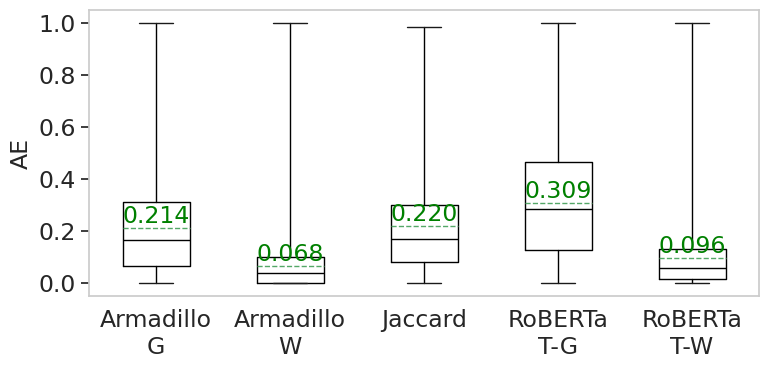

In [54]:
#Wiki
plot_box_group(runtimes_wikitables, FONTSIZE=17, y_lim=(-0.05, 1.05), fig_size=(8,4), label_dict={'armadillo_g_w_ae':'Armadillo\nG','armadillo_w_w_ae':'Armadillo\nW','jsim_AE':'Jaccard','roberta_tables_300_300_gittables_ae':'RoBERTa\nT-G','roberta_tables_300_300_wikilast_ae':'RoBERTa\nT-W'}, label_y='AE',out_pdf=PDF_DIR+'box_plots_wiki.pdf')

In [56]:
#Git
with open('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/evaluation/re_eval_armadillo_w_g.pkl', 'rb') as f:
    re_eval_armadillo_git = pickle.load(f)
runtimes_gittables['new_col_w_g'] = [float(n) for n in re_eval_armadillo_git['predictions']]
runtimes_gittables['armadillo_w_g_ae'] = abs(runtimes_gittables['new_col_w_g']-runtimes_gittables['a%'])

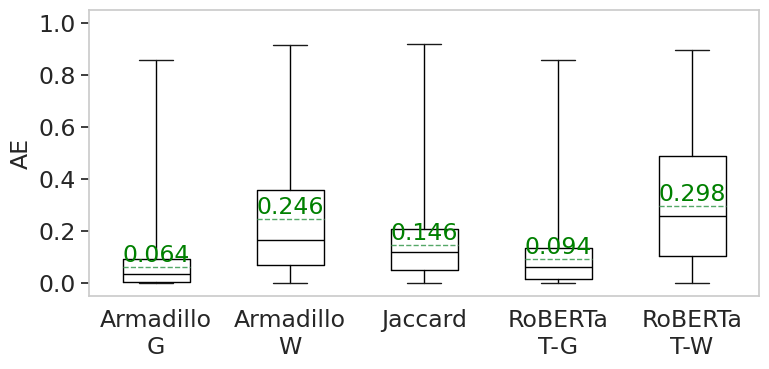

In [57]:
#Git
runtimes_gittables['jsim_AE'] = abs(runtimes_gittables['jsim']-runtimes_gittables['a%'])
plot_box_group(runtimes_gittables, FONTSIZE=17, y_lim=(-0.05, 1.05),fig_size=(8,4), label_dict={'armadillo_g_g_ae':'Armadillo\nG','armadillo_w_g_ae':'Armadillo\nW','jsim_AE':'Jaccard','roberta_t_g_g_ae':'RoBERTa\nT-G','roberta_t_w_g_ae':'RoBERTa\nT-W'}, label_y='AE',out_pdf=PDF_DIR+'box_plots_git.pdf')

In [25]:
runtimes_wikitables.describe()

,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,os_sim_AE,armadillo_wikilast_overlap_time,...,roberta_tables_300_300_gittables_ae,armadillo_w_w_overlap_time,armadillo_w_w_overlap_pred,armadillo_w_w_ae,jaccard_bag_union_times,jaccard_bag_union_predictions,jaccard_bag_union_ae,jaccard_bag_smaller_times,jaccard_bag_smaller_predictions,jaccard_bag_smaller_ae
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,67.941967,0.647238,5.192626e-06,0.820302,1.992679e-06,0.496343,0.914817,0.219903,0.325091,0.009488,...,0.308703,0.009176,0.501677,0.070559,0.000197,0.320538,0.246548,0.000197,0.709125,0.269883
std,160.590663,0.203651,3.881562e-06,0.143001,1.404466e-06,0.291760,2.065447,0.192537,0.252332,0.008482,...,0.223084,0.008453,0.300498,0.092452,0.000796,0.113399,0.188462,0.000796,0.214616,0.226999
min,1.000000,0.068627,2.384186e-07,0.189655,4.768372e-07,0.011494,0.000091,0.000000,0.000000,0.004070,...,0.000000,0.003999,0.000000,0.000000,0.000023,0.000000,0.000000,0.000023,0.000000,0.000000
25%,9.000000,0.488372,3.099442e-06,0.720000,1.192093e-06,0.250000,0.000334,0.083333,0.100000,0.005404,...,0.126430,0.005213,0.247519,0.000985,0.000031,0.250000,0.083333,0.000031,0.577778,0.071429
50%,22.000000,0.634615,4.291534e-06,0.842105,1.668930e-06,0.498705,0.000616,0.169312,0.333333,0.006873,...,0.285967,0.006445,0.487204,0.041301,0.000036,0.333333,0.214286,0.000036,0.733333,0.250000
75%,41.000000,0.794118,5.960464e-06,0.945205,2.384186e-06,0.750000,0.174530,0.300000,0.500000,0.008545,...,0.465784,0.008047,0.769231,0.102530,0.000047,0.416667,0.392857,0.000047,0.861111,0.423077
max,1428.000000,1.000000,1.418591e-04,1.000000,4.029274e-05,1.000000,37.229370,0.984375,0.984375,0.094850,...,1.000000,0.094443,1.000000,1.000000,0.035141,0.500000,1.000000,0.035141,1.000000,1.000000


In [28]:
runtimes_wikitables['jaccard_bag_smaller_times'].sum()

11.844988107680853

In [57]:
runtimes_gittables['jaccard_bag_smaller_times'].sum()

5173.512680768965

In [56]:
runtimes_gittables.describe()

,r_w,r_h,r_a,s_w,s_h,s_a,jsim,jsim_time,josie,josie_time,...,roberta_t_w_g_overlap_pred,roberta_t_w_g_ae,cosine_similarity_overlap_time,jaccard_bag_union_times,jaccard_bag_union_predictions,jaccard_bag_union_ae,jaccard_bag_smaller_times,jaccard_bag_smaller_predictions,jaccard_bag_smaller_ae,jsim_AE
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,15.281170,169.289470,2171.915710,14.337510,165.857330,2142.783040,0.500131,5.419840e-05,0.668945,1.928793e-05,...,0.768615,0.297559,0.000115,0.051735,0.296376,0.249617,0.051735,0.630668,0.174452,0.145819
std,23.027123,303.259325,3930.309646,15.256333,288.400498,3872.915641,0.269041,1.052395e-04,0.239973,4.573539e-05,...,0.235214,0.222011,0.000203,0.149365,0.127709,0.164783,0.149365,0.242827,0.173083,0.130636
min,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,9.536743e-07,0.000000,7.152557e-07,...,0.000000,0.000000,0.000110,0.000030,0.000000,0.000000,0.000030,0.000000,0.000000,0.000000
25%,7.000000,19.000000,187.000000,6.000000,19.000000,187.000000,0.291480,1.287460e-05,0.497183,4.291534e-06,...,0.703679,0.106064,0.000113,0.000174,0.219496,0.128357,0.000174,0.477011,0.042312,0.049841
50%,11.000000,36.000000,696.000000,11.000000,37.000000,654.000000,0.447546,1.835823e-05,0.672727,6.198883e-06,...,0.816534,0.256737,0.000113,0.001507,0.305857,0.219512,0.001507,0.647727,0.113636,0.120330
75%,19.000000,192.000000,1218.000000,19.000000,196.000000,1218.000000,0.703704,4.464388e-05,0.880249,1.358986e-05,...,0.942275,0.488920,0.000114,0.005519,0.398193,0.357576,0.005519,0.834764,0.266667,0.209056
max,592.000000,5734.000000,16074.000000,492.000000,5734.000000,16264.000000,1.000000,1.647592e-02,1.000000,9.999037e-03,...,1.000000,0.898025,0.064399,1.619432,0.500000,0.995076,1.619432,1.000000,0.990152,0.918760


# Mean Absolute Error (MAE) per overlap interval

In [8]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns

def compare_models_hist(data: pd.DataFrame | str, approaches: dict, bin_criterion: str='a%', bins_name: str='Correct Label', out_pdf: str=None, font_scale: float=1.45, n_col: int=4, fig_size=(8,6)) -> None:
    if isinstance(data, str):
        data = pd.read_csv(data)
    ranges = f'{bins_name} Range' 
    new_data = {
        ranges:[],
        'Approach':[],
        'MAE':[]
    }
    for i in range(1, 11, 1):
        i /= 10
        prev = round(i-0.1, 2)
        t = data[data[bin_criterion] >= prev]
        if i == 1:
            t = t[t[bin_criterion] <= i]
        else:
            t = t[t[bin_criterion] < i] 
        curr =  f'[{prev},\n{i}]'
        for k in approaches.keys():
            new_data['Approach'].append(approaches[k])
            new_data[ranges].append(curr)
            new_data['MAE'].append(round(np.mean(t[k]),2))
    plt.figure(figsize=fig_size)
    df = pd.DataFrame(new_data)
    sns.set_theme(font_scale=font_scale, style="whitegrid")
    ax = sns.barplot(data=df, x=ranges, y='MAE', hue='Approach')
    plt.grid(False)
    plt.tick_params(left = True) 
    plt.legend(bbox_to_anchor=(0.5, 1.29), loc='upper center', ncol=n_col)
    if isinstance(out_pdf, str):
        plt.tight_layout()
        plt.savefig(out_pdf, format="pdf", bbox_inches='tight')

In [9]:
runtimes_wikitables = pd.read_csv(RESULTS_PATH_WIKI)
runtimes_gittables = pd.read_csv(RESULTS_PATH_GIT)

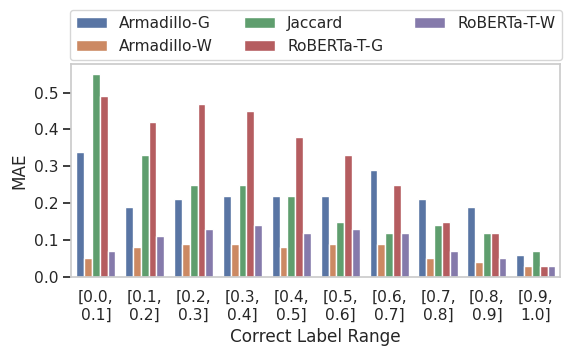

In [55]:
#Wiki
compare_models_hist(n_col=3, font_scale=1.01,fig_size=(6,4), data=runtimes_wikitables,approaches={'armadillo_g_w_ae':'Armadillo-G','armadillo_w_w_ae':'Armadillo-W','jsim_AE':'Jaccard','roberta_tables_300_300_gittables_ae':'RoBERTa-T-G','roberta_tables_300_300_wikilast_ae':'RoBERTa-T-W'},out_pdf=PDF_DIR+'mae_per_bin_wiki.pdf')

In [34]:
runtimes_gittables.iloc[:,:15]


,r_id,r_w,r_h,r_a,s_id,s_w,s_h,s_a,jsim,jsim_time,josie,josie_time,seeds,algo,o_w
0,object_csv_licensed.zip_IA2ComProxy.dll.csv__2...,11,80,880,object_csv_licensed.zip_bcastdvr.proxy.dll.csv...,11,86,946,0.656000,0.000017,0.820000,0.000007,4,e,4.0
1,seek_time_csv_licensed.zip_PL1331LAGRZW3H.csv,19,753,14307,seek_time_csv_licensed.zip_PL2331LAGMH50J.csv,19,823,15637,0.341833,0.000233,0.526380,0.000076,156,a,11.0
2,quick_time_csv_licensed.zip_funcs_by_name_369.csv,2,1587,3174,safe_period_csv_licensed.zip_funcs_by_address_...,2,1469,2938,0.310868,0.000424,0.493272,0.000157,2,e,1.0
3,parent_csv_licensed.zip_Configuration4_window0...,24,237,5688,parent_csv_licensed.zip_poi-1.5_56.csv,24,237,5688,0.933735,0.000152,0.965732,0.000063,268,e,21.0
4,show_time_csv_licensed.zip_quotes.db.csv,4,210,840,then_csv_licensed.zip_phrasebook.csv,3,235,705,0.302158,0.000052,0.482759,0.000018,2,e,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,id_csv_licensed.zip_res.country.state_1248.csv,4,59,236,parent_csv_licensed.zip_09-10_1960.csv,11,113,1243,0.000000,0.000029,0.000000,0.000004,0,NaN,0.0
99996,lead_time_csv_licensed.zip_TF.csv,6,372,2232,processing_time_csv_licensed.zip_W06-2932_vard...,11,17,187,0.001992,0.000018,0.011364,0.000003,15,e,3.0
99997,real_time_csv_licensed.zip_ResNet034-v2_161.csv,5,124,620,seek_time_csv_licensed.zip_PL2331LAGUKN9J.csv,19,636,12084,0.000000,0.000060,0.000000,0.000005,0,NaN,0.0
99998,rate_of_return_csv_licensed.zip_messages_pt_25...,4,549,2196,object_csv_licensed.zip_31f.0.testMap.csv,2,571,1142,0.000000,0.000101,0.000000,0.000024,0,NaN,0.0


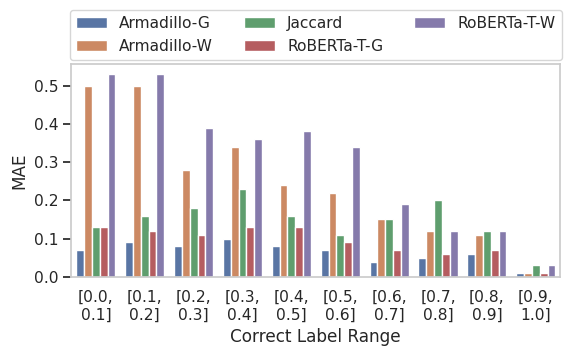

In [58]:
runtimes_gittables['jsim_AE'] = abs(runtimes_gittables['jsim']-runtimes_gittables['a%'])
compare_models_hist(n_col=3, font_scale=1.01,fig_size=(6,4),data=runtimes_gittables,approaches={'armadillo_g_g_ae':'Armadillo-G','armadillo_w_g_ae':'Armadillo-W','jsim_AE':'Jaccard','roberta_t_g_g_ae':'RoBERTa-T-G','roberta_t_w_g_ae':'RoBERTa-T-W'},out_pdf=PDF_DIR+'mae_per_bin_git.pdf')

# Cumulative execution time per model

In [10]:
# from Code._performance_overlap_computation import *
from tqdm import tqdm
import pandas as pd
def reduce_range(l_in: list) -> list:
    return [k/1000 for k in l_in]

def show_scatter_t_exec_sloth_arm(results: str | pd.DataFrame, x_label: str='tot_area', logx: bool=True, logy: bool=True, output_pdf: str=None, x_axis: str=None, font_size=15, zoom:int =None) -> None:
    if isinstance(results, str):
        data = pd.read_csv(results)
    else:
        data = results
    
    plt.figure()
    ax_scatter = plt.subplot()
    # plt.ticklabel_format(axis='both', style='sci', scilimits=(3,3), useMathText=True)
    if x_axis == None:
        x = t_execs_sloth
    else:
        x = reduce_range(data[x_axis])
    if zoom!=None:
         plt.ylim(0, zoom)
    try:
        t_execs_sloth = reduce_range(data['sloth_time'])
        ax_scatter.scatter(x, t_execs_sloth, s=3, c='black', alpha=0.7, edgecolors='black', label='Sloth')
    except:
        pass
    try:
        t_execs_embdi_wikilast_overlap_time = reduce_range(data['embdi_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_embdi_wikilast_overlap_time, s=3, c='grey', alpha=0.7, edgecolors='grey', label='EmbDI')
    except:
        pass
    try:
        t_execs_jsim = reduce_range(data['jsim_time'])
        ax_scatter.scatter(x, t_execs_jsim, s=3, c='green', alpha=0.7, edgecolors='green', label='Jaccard')
    except:
        pass

    try:
        t_execs_armadillo_wikilast = reduce_range(data['armadillo_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_armadillo_wikilast, s=3, c='blue', alpha=0.7, edgecolors='blue', label='Armadillo')
    except:
        pass

    try:
        t_execs_turl_wikilast_overlap_time = reduce_range(data['turl_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_turl_wikilast_overlap_time, s=3, c='orange', alpha=0.7, edgecolors='orange', label='TURL')
    except:
        pass
    try:
        t_execs_roberta_tables_300_300_wikilast_overlap_time = reduce_range(data['roberta_tables_300_300_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_roberta_tables_300_300_wikilast_overlap_time, s=3, c='pink', alpha=0.7, edgecolors='pink', label='RoBERTa-T')
    except:
        pass
    try:
        t_execs_roberta_rows_300_300_wikilast_overlap_time = reduce_range(data['roberta_rows_300_300_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_roberta_rows_300_300_wikilast_overlap_time, s=3, c='brown', alpha=0.7, edgecolors='brown', label='RoBERTa-R')
    except:
        pass
    if zoom == None:
        ax_scatter.set_ylabel(f'Cumulative runtime (s)($10^3$)',fontsize=font_size)
        ax_scatter.set_xlabel(f'Number of samples ($10^3$)', fontsize=font_size)
    if logx:
        ax_scatter.set_xscale('log')
    if logy:
        ax_scatter.set_yscale('log')
    
    ax_scatter.tick_params(axis='both', which='major', labelsize=font_size)  


    ax_scatter.tick_params(axis='both', which='both', labelsize=font_size)
    if zoom == None:
        ax_scatter.legend(fontsize=font_size, scatterpoints=100,loc='upper center', bbox_to_anchor=(0.5, 1.35),
            ncol=3, fancybox=True, shadow=True)
    plt.grid(False)
    # plt.tight_layout()
    if isinstance(output_pdf, str):
        plt.savefig(output_pdf, format="pdf", bbox_inches="tight")
    plt.show()

def build_incremental_t_execs(results: pd.DataFrame | str, interval: int=100, sort: bool=True) -> None:
    if isinstance(results, str):
        results = pd.read_csv(results)
    if sort:
        try:
            results = results.sort_values(by='sloth_time', ascending=True)
        except:
            results = results.sort_values(by='total_time', ascending=True)
    df_out = {
        'n_samples':[],
        'sloth_time':[],
        'jsim_time':[],
        'cosine_similarity_overlap_time':[],

        'armadillo_wikilast_overlap_time':[],
        'embdi_wikilast_overlap_time':[],
        'turl_wikilast_overlap_time':[],
        'roberta_tables_300_300_wikilast_overlap_time':[],
        'roberta_rows_300_300_wikilast_overlap_time':[]
    }
    cur_sum = {
        'sloth_time':0,
        'jsim_time':0,
        'cosine_similarity_overlap_time':0,

        'armadillo_wikilast_overlap_time':0,
        'embdi_wikilast_overlap_time':0,
        'turl_wikilast_overlap_time':0,
        'roberta_tables_300_300_wikilast_overlap_time':0,
        'roberta_rows_300_300_wikilast_overlap_time':0
    }
    for r in tqdm(range(results.shape[0])):
        for k in cur_sum.keys():
            try:
                cur_sum[k] += results.iloc[r].loc[k]
            except:
                if k == 'sloth_time':
                    cur_sum[k] += results.iloc[r].loc['total_time']
                else:
                    print(f'K was {k}')
                    raise Exception
        if (r % interval) == 0:
            df_out['n_samples'].append(r+1)
            for k in cur_sum.keys():
                try:
                    df_out[k].append(cur_sum[k])
                except:
                    if k == 'sloth_time':
                        df_out[k].append(cur_sum['total_time'])
                    else: 
                        raise Exception
    df_out = pd.DataFrame(df_out)
    return df_out


In [11]:
def show_scatter_t_exec_sloth_arm_small(results: str | pd.DataFrame, x_label: str='tot_area', logx: bool=True, logy: bool=True, output_pdf: str=None, x_axis: str=None, font_size=15, zoom:int =10) -> None:
    if isinstance(results, str):
        data = pd.read_csv(results)
    else:
        data = results
    
    plt.figure()
    ax_scatter = plt.subplot()
    # plt.ticklabel_format(axis='both', style='sci', scilimits=(3,3), useMathText=True)
    if x_axis == None:
        x = t_execs_sloth
    else:
        x = reduce_range(data[x_axis])
    if zoom!=None:
         plt.ylim(-0.5, zoom)
    try:
        t_execs_sloth = reduce_range(data['sloth_time'])
        ax_scatter.scatter(x, t_execs_sloth, s=7, c='black', alpha=0.7, edgecolors='black', label='Sloth')
    except:
        pass
    try:
        t_execs_embdi_wikilast_overlap_time = reduce_range(data['embdi_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_embdi_wikilast_overlap_time, s=7, c='grey', alpha=0.7, edgecolors='grey', label='EmbDI')
    except:
        pass
    # try:
    #     t_execs_cosine = reduce_range(data['cosine_similarity_overlap_time'])
    #     ax_scatter.scatter(x, t_execs_cosine, s=3, c='red', alpha=0.7, edgecolors='red', label='Cosine')
    # except:
    #     pass
    try:
        t_execs_jsim = reduce_range(data['jsim_time'])
        ax_scatter.scatter(x, t_execs_jsim, s=3, c='green', alpha=0.7, edgecolors='green', label='Jaccard')
    except:
        pass

    try:
        t_execs_armadillo_wikilast = reduce_range(data['armadillo_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_armadillo_wikilast, s=7, c='blue', alpha=0.7, edgecolors='blue', label='Armadillo')
    except:
        pass

    try:
        t_execs_turl_wikilast_overlap_time = reduce_range(data['turl_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_turl_wikilast_overlap_time, s=7, c='orange', alpha=0.7, edgecolors='orange', label='TURL')
    except:
        pass
    try:
        t_execs_roberta_tables_300_300_wikilast_overlap_time = reduce_range(data['roberta_tables_300_300_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_roberta_tables_300_300_wikilast_overlap_time, s=7, c='pink', alpha=0.7, edgecolors='pink', label='RoBERTa-T')
    except:
        pass
    try:
        t_execs_roberta_rows_300_300_wikilast_overlap_time = reduce_range(data['roberta_rows_300_300_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_roberta_rows_300_300_wikilast_overlap_time, s=7, c='brown', alpha=0.7, edgecolors='brown', label='RoBERTa-R')
    except:
        pass
    if zoom == None:
        ax_scatter.set_ylabel(f'Cumulative runtime (s)($10^3$)',fontsize=font_size)
        ax_scatter.set_xlabel(f'Number of samples ($10^3$)', fontsize=font_size)
    
    # ax_scatter.tick_params(axis='both', which='major', labelsize=font_size)  


    # ax_scatter.tick_params(axis='both', which='both', labelsize=font_size)
    ax_scatter.set_yticklabels([])
    ax_scatter.set_xticklabels([])

    plt.grid(False)
    # plt.tight_layout()
    if isinstance(output_pdf, str):
        plt.savefig(output_pdf, format="pdf", bbox_inches="tight")
    plt.show()

In [12]:
def show_scatter_t_exec_sloth_arm_v2(results: str | pd.DataFrame, x_label: str='tot_area', logx: bool=True, logy: bool=True, output_pdf: str=None, x_axis: str=None, font_size=18, zoom:int =None,
                                     figsize: tuple=(11.0,7.0)) -> None:

    if isinstance(results, str):
        data = pd.read_csv(results)
    else:
        data = results
    
    plt.rcParams["figure.figsize"] = [figsize[0], figsize[1]]
    plt.rcParams["figure.autolayout"] = True

    plt.figure()
    ax_scatter = plt.subplot()
    # plt.ticklabel_format(axis='both', style='sci', scilimits=(3,3), useMathText=True)
    if x_axis == None:
        x = t_execs_sloth
    else:
        x = reduce_range(data[x_axis])
    if zoom!=None:
         plt.ylim(-4, zoom)
    try:
        t_execs_sloth = reduce_range(data['sloth_time'])
        ax_scatter.scatter(x, t_execs_sloth, s=3, c='black', alpha=0.7, edgecolors='black', label='Sloth')
    except:
        pass
    try:
        t_execs_embdi_wikilast_overlap_time = reduce_range(data['embdi_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_embdi_wikilast_overlap_time, s=3, c='grey', alpha=0.7, edgecolors='grey', label='EmbDI')
    except:
        pass
    # try:
    #     t_execs_cosine = reduce_range(data['cosine_similarity_overlap_time'])
    #     ax_scatter.scatter(x, t_execs_cosine, s=3, c='red', alpha=0.7, edgecolors='red', label='Cosine')
    # except:
    #     pass
    try:
        t_execs_jsim = reduce_range(data['jsim_time'])
        ax_scatter.scatter(x, t_execs_jsim, s=3, c='green', alpha=0.7, edgecolors='green', label='Jaccard')
    except:
        pass

    try:
        t_execs_armadillo_wikilast = reduce_range(data['armadillo_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_armadillo_wikilast, s=3, c='blue', alpha=0.7, edgecolors='blue', label='Armadillo')
    except:
        pass

    try:
        t_execs_turl_wikilast_overlap_time = reduce_range(data['turl_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_turl_wikilast_overlap_time, s=3, c='orange', alpha=0.7, edgecolors='orange', label='TURL')
    except:
        pass
    try:
        t_execs_roberta_tables_300_300_wikilast_overlap_time = reduce_range(data['roberta_tables_300_300_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_roberta_tables_300_300_wikilast_overlap_time, s=3, c='pink', alpha=0.7, edgecolors='pink', label='RoBERTa-T')
    except:
        pass
    try:
        t_execs_roberta_rows_300_300_wikilast_overlap_time = reduce_range(data['roberta_rows_300_300_wikilast_overlap_time'])
        ax_scatter.scatter(x, t_execs_roberta_rows_300_300_wikilast_overlap_time, s=3, c='brown', alpha=0.7, edgecolors='brown', label='RoBERTa-R')
    except:
        pass
    ax_scatter.set_ylabel(f'Cumulative runtime (s)($10^3$)',fontsize=font_size)
    ax_scatter.set_xlabel(f'Number of samples ($10^3$)', fontsize=font_size)

    ax_scatter.tick_params(axis='both', which='major', labelsize=font_size)  

    ax_scatter.tick_params(axis='both', which='both', labelsize=font_size)
    if zoom == None or zoom >= 70:
        ax_scatter.legend(fontsize=font_size, scatterpoints=100,loc='upper center', bbox_to_anchor=(0.5, 1.16),
            ncol=4, fancybox=True, shadow=True)
    plt.grid(False)
    # plt.tight_layout()
    if isinstance(output_pdf, str):
        plt.savefig(output_pdf, format="pdf", bbox_inches="tight")
    plt.show()

In [13]:
runtimes_wikitables = pd.read_csv(RESULTS_PATH_WIKI)
runtimes_wikitables['jsim_time'] = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test_with_correct_jaccard_time.csv')['jaccard_runtime_correct']
runtimes_gittables = pd.read_csv(RESULTS_PATH_GIT)
runtimes_gittables['jsim_time'] = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/test_with_correct_jaccard_time.csv')['jaccard_runtime_correct']

In [23]:
runtimes_gittables['jsim_time'].sum()

29.208038091654597

In [24]:
runtimes_gittables['armadillo_w_g_ae'].mean()

0.2501900027725922

In [25]:
runtimes_wikitables

,r_id,s_id,seeds,jsim,jsim_time,os_sim,os_sim_time,a%,sloth_time,jsim_AE,...,armadillo_w_w_ae,jaccard_bag_union_times,jaccard_bag_union_predictions,jaccard_bag_union_ae,jaccard_bag_smaller_times,jaccard_bag_smaller_predictions,jaccard_bag_smaller_ae,jaccard_bag_union_scaled_predictions,jaccard_bag_union_scaled_predictions_ae,area_ratio
0,198.7650.csv,198.97756.csv,88,0.583333,0.000311,0.736842,0.000001,0.215385,3.205166,0.367949,...,9.437431e-02,0.000175,0.246154,0.030769,0.000175,0.492308,0.276923,0.492308,0.276923,1.000000
1,309.87528.csv,309.87529.csv,4,0.280000,0.000120,0.437500,0.000001,0.250000,0.000202,0.030000,...,1.703054e-01,0.000046,0.218750,0.031250,0.000046,0.437500,0.187500,0.437500,0.187500,1.000000
2,124.35588.csv,574.6628.csv,70,0.439716,0.000156,0.639175,0.000004,0.105769,3.087128,0.333947,...,9.089013e-02,0.000786,0.235043,0.129274,0.000786,0.528846,0.423077,0.470085,0.364316,0.800000
3,225.64426.csv,401.116864.csv,17,0.692308,0.000133,0.818182,0.000005,0.800000,0.000886,0.107692,...,1.577067e-01,0.000054,0.450000,0.350000,0.000054,0.900000,0.100000,0.900000,0.100000,1.000000
4,441.155903.csv,618.72349.csv,110,0.487179,0.000117,0.791667,0.000003,0.281250,3.848327,0.205929,...,1.202551e-01,0.000089,0.180556,0.100694,0.000089,0.406250,0.125000,0.361111,0.079861,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000175,0.933333,0.000003,0.058065,11.562310,0.816935,...,2.799015e-07,0.001213,0.446237,0.388172,0.001213,0.892473,0.834409,0.892473,0.834409,1.000000
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000120,0.687500,0.000005,0.200000,3.126973,0.291071,...,2.543482e-01,0.000394,0.235294,0.035294,0.000394,0.533333,0.333333,0.470588,0.270588,0.789474
59997,382.160.csv,440.84900.csv,12,0.300000,0.000092,0.500000,0.000002,0.333333,0.000358,0.033333,...,3.470599e-01,0.000036,0.261905,0.071429,0.000036,0.611111,0.277778,0.523810,0.190476,0.750000
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000087,0.600000,0.000002,0.400000,0.000246,0.028571,...,7.161210e-02,0.000029,0.250000,0.150000,0.000029,0.500000,0.100000,0.500000,0.100000,1.000000


In [26]:
runtimes_wikitables['armadillo_g_w_ae'].mean()

0.21374846741987846

In [27]:
runtimes_wikitables.describe()[['sloth_time','jsim_time','armadillo_wikilast_overlap_time','embdi_wikilast_overlap_time','turl_wikilast_overlap_time',
                                'bert_tables_300_300_wikilast_overlap_time','bert_tables_anon_300_300_wikilast_overlap_time','roberta_tables_300_300_wikilast_overlap_time',
                                'roberta_tables_anon_300_300_wikilast_overlap_time','bert_rows_300_300_wikilast_overlap_time','roberta_rows_300_300_wikilast_overlap_time','jsim_AE',
                                'armadillo_wikilast_ae', 'embdi_wikilast_ae','turl_wikilast_ae','bert_tables_300_300_wikilast_ae','bert_tables_anon_300_300_wikilast_ae',
                                'roberta_tables_300_300_wikilast_ae','roberta_tables_anon_300_300_wikilast_ae','bert_rows_300_300_wikilast_ae','roberta_rows_300_300_wikilast_ae']]

,sloth_time,jsim_time,armadillo_wikilast_overlap_time,embdi_wikilast_overlap_time,turl_wikilast_overlap_time,bert_tables_300_300_wikilast_overlap_time,bert_tables_anon_300_300_wikilast_overlap_time,roberta_tables_300_300_wikilast_overlap_time,roberta_tables_anon_300_300_wikilast_overlap_time,bert_rows_300_300_wikilast_overlap_time,...,jsim_AE,armadillo_wikilast_ae,embdi_wikilast_ae,turl_wikilast_ae,bert_tables_300_300_wikilast_ae,bert_tables_anon_300_300_wikilast_ae,roberta_tables_300_300_wikilast_ae,roberta_tables_anon_300_300_wikilast_ae,bert_rows_300_300_wikilast_ae,roberta_rows_300_300_wikilast_ae
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.914817,0.000095,0.009488,1.173687,0.058871,0.026863,0.150779,0.026209,0.037996,0.152740,...,0.219903,0.113012,0.336179,0.197212,0.091124,0.207000,0.096009,0.188006,0.111539,0.142929
std,2.065447,0.000019,0.008482,0.762805,0.022629,0.015343,0.273550,0.012989,0.039475,0.266953,...,0.192537,0.132902,0.232508,0.207877,0.113570,0.231115,0.115999,0.223260,0.137704,0.157536
min,0.000091,0.000077,0.004070,0.006124,0.025975,0.012522,0.024649,0.015298,0.016361,0.013383,...,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000334,0.000087,0.005404,0.750225,0.048873,0.018830,0.040915,0.019787,0.022752,0.054830,...,0.083333,0.020418,0.132204,0.037028,0.013400,0.022493,0.014522,0.025854,0.017758,0.025677
50%,0.000616,0.000090,0.006873,0.941092,0.053752,0.022479,0.068727,0.022328,0.026034,0.088317,...,0.169312,0.071481,0.322591,0.125065,0.053502,0.108146,0.057627,0.094877,0.065192,0.092538
75%,0.174530,0.000094,0.008545,1.303246,0.059945,0.027440,0.094880,0.026065,0.031391,0.141001,...,0.300000,0.158734,0.517205,0.294277,0.123640,0.299911,0.132512,0.257905,0.149523,0.204584
max,37.229370,0.000540,0.094850,10.463514,0.522457,0.175493,2.817755,0.126345,1.820899,4.076998,...,0.984375,0.948371,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
total_time_wiki = {}
total_time_wiki['Sloth_W'] = runtimes_wikitables['sloth_time'].sum()
total_time_wiki['Armadillo_W-W'] = runtimes_wikitables['armadillo_wikilast_overlap_time'].sum()
# total_time_wiki['Armadillo_G'] = runtimes_wikitables['armadillo_wikilast_overlap_time'].sum()
total_time_wiki['Cosine_similarity'] = runtimes_wikitables['cosine_similarity_overlap_time'].sum()

total_time_wiki['EmbDI_W'] = runtimes_wikitables['embdi_wikilast_overlap_time'].sum()
total_time_wiki['Jaccard'] = runtimes_wikitables['jsim_time'].sum()
# total_time_wiki['TURL-T-G'] = runtimes_wikitables[''].sum()
total_time_wiki['TURL-T-W'] = runtimes_wikitables['turl_wikilast_overlap_time'].sum()
# total_time_wiki['BERT-R-G'] = runtimes_wikitables[''].sum()
total_time_wiki['BERT-R-W'] = runtimes_wikitables['bert_rows_300_300_wikilast_overlap_time'].sum()
# total_time_wiki['BERT-T-G'] = runtimes_wikitables[''].sum()
total_time_wiki['BERT-T-W'] = runtimes_wikitables['bert_tables_300_300_wikilast_overlap_time'].sum()
total_time_wiki['BERT-T-W-N'] = runtimes_wikitables['bert_tables_anon_300_300_wikilast_overlap_time'].sum()
# total_time_wiki['RoBERTa-R-G'] = runtimes_wikitables[''].sum()
total_time_wiki['RoBERTa-R-W'] = runtimes_wikitables['roberta_rows_300_300_wikilast_overlap_time'].sum()
# total_time_wiki['RoBERTa-T-G'] = runtimes_wikitables[''].sum()
total_time_wiki['RoBERTa-T-W'] = runtimes_wikitables['roberta_tables_300_300_wikilast_overlap_time'].sum()
total_time_wiki['RoBERTa-T-W-N'] = runtimes_wikitables['roberta_tables_anon_300_300_wikilast_overlap_time'].sum()
total_time_wiki['Armadillo-G-W'] = runtimes_wikitables['armadillo_g_w_overlap_time'].sum()

total_time_wiki

{'Sloth_W': 54888.991956710815,
 'Armadillo_W-W': 569.2997176647158,
 'Cosine_similarity': 6.876787900922128,
 'EmbDI_W': 70421.20024991035,
 'Jaccard': 5.722347497939575,
 'TURL-T-W': 3532.282869100568,
 'BERT-R-W': 9164.370517253876,
 'BERT-T-W': 1611.7836229801146,
 'BERT-T-W-N': 9046.735109090805,
 'RoBERTa-R-W': 9301.329304933548,
 'RoBERTa-T-W': 1572.534730195996,
 'RoBERTa-T-W-N': 2279.7631149291965,
 'Armadillo-G-W': 570.1592116355868}

In [29]:
wikitables_inc_no_sort = build_incremental_t_execs(runtimes_wikitables, sort=False)

100%|██████████| 60000/60000 [00:24<00:00, 2422.71it/s]


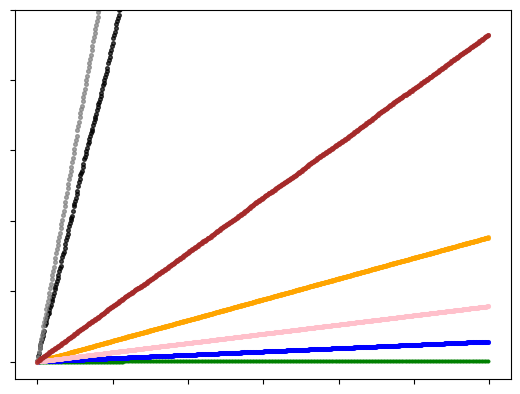

In [30]:
show_scatter_t_exec_sloth_arm_small(wikitables_inc_no_sort, x_axis='n_samples', logx=False, logy=False, output_pdf=PDF_DIR+'cumulative_t_execs_no_sort_zoom.pdf', zoom=10)

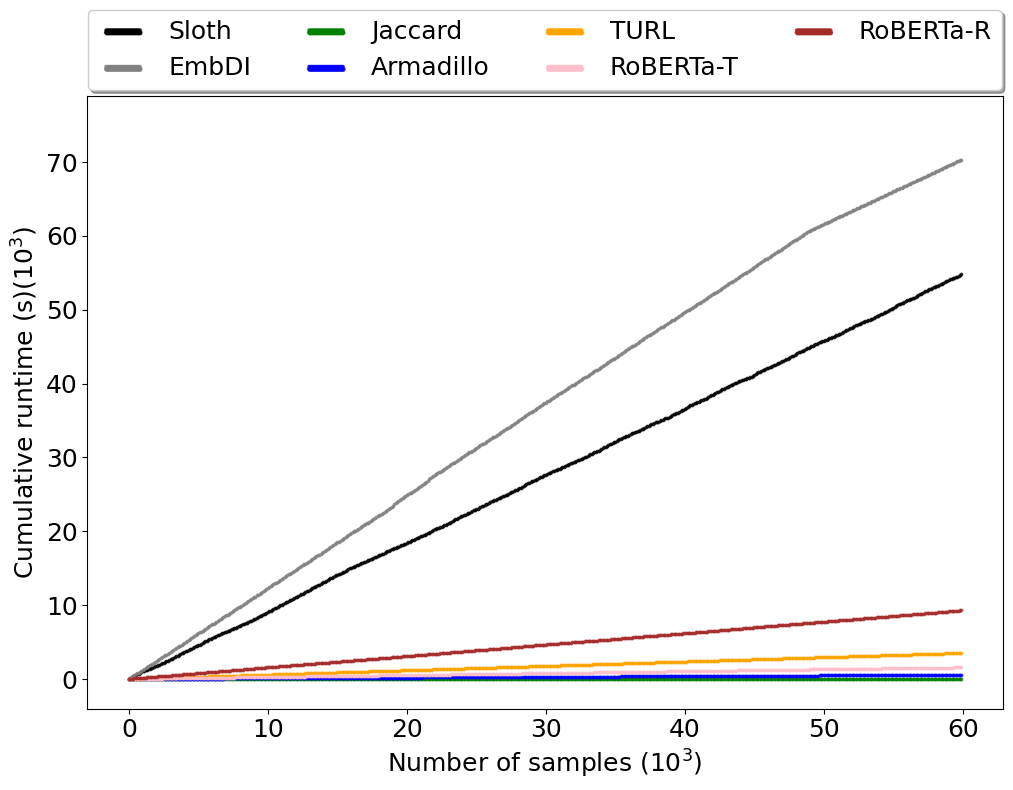

In [31]:
show_scatter_t_exec_sloth_arm_v2(wikitables_inc_no_sort, x_axis='n_samples', logx=False, logy=False, output_pdf=PDF_DIR+'cumulative_t_execs_no_sort.pdf',figsize=(10.3,8), zoom=79)

# NDCG score

In [12]:
from Code._table_querying import *

In [14]:
def compute_ndcg_at_k(table_querying_arm_sloth: str | pd.DataFrame, query_set: str | set, outpath: str, k_max: int=100) -> pd.DataFrame:
    if isinstance(table_querying_arm_sloth, str):
        table_querying_arm_sloth = pd.read_csv(table_querying_arm_sloth)
    if isinstance(query_set, str):
        with open(query_set, 'rb') as f:
            query_set = pickle.load(f)
    
    out = {
        'k':[],
        'query_table':[],
        'Armadillo':[],
        'Jaccard':[],
        'Jaccard-B-U':[],
        'Jaccard-B-S':[],
        'BERT-R':[],
        'BERT-T':[],
        'RoBERTa-R':[],
        'RoBERTa-T':[],
        'TURL-T':[],
        'RoBERTa-T-N':[],
        'BERT-T-N':[]
    }

    for k in [1,10,100,1000]:#range(0, k_max+1, 10):
        if k == 0:
            k=1
        print(f'Current k: {k}')
        for t in tqdm(query_set):
            out['k'].append(k)
            out['query_table'].append(t)
            curr_subset = table_querying_arm_sloth[table_querying_arm_sloth['r_id']==t]
            out['Armadillo'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['armadillo_g_g_overlap_pred']]).reshape(1,-1), k=k))
            out['Jaccard'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['jsim']]).reshape(1,-1), k=k))
            out['Jaccard-B-U'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['jaccard_bag_union_predictions']]).reshape(1,-1), k=k))
            out['Jaccard-B-S'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['jaccard_bag_smaller_predictions']]).reshape(1,-1), k=k))
            out['BERT-R'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['bert_r_overlap_pred']]).reshape(1,-1), k=k))
            out['BERT-T'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['bert_t_overlap_pred']]).reshape(1,-1), k=k))
            out['RoBERTa-R'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['roberta_r_overlap_pred']]).reshape(1,-1), k=k))
            out['RoBERTa-T'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['roberta_t_overlap_pred']]).reshape(1,-1), k=k))
            out['TURL-T'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['turl_overlap_pred']]).reshape(1,-1), k=k))
            
            out['RoBERTa-T-N'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['roberta_t_n_overlap_pred']]).reshape(1,-1), k=k))
            out['BERT-T-N'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['bert_t_n_overlap_pred']]).reshape(1,-1), k=k))
    k = 10_000
    for t in query_set:
        out['k'].append(k)
        out['query_table'].append(t)
        curr_subset = table_querying_arm_sloth[table_querying_arm_sloth['r_id']==t]
        out['Armadillo'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['armadillo_g_g_overlap_pred']]).reshape(1,-1), k=k))
        out['Jaccard'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['jsim']]).reshape(1,-1), k=k))
        out['Jaccard-B-U'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['jaccard_bag_union_predictions']]).reshape(1,-1), k=k))
        out['Jaccard-B-S'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['jaccard_bag_smaller_predictions']]).reshape(1,-1), k=k))
        out['BERT-R'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['bert_r_overlap_pred']]).reshape(1,-1), k=k))
        out['BERT-T'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['bert_t_overlap_pred']]).reshape(1,-1), k=k))
        out['RoBERTa-R'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['roberta_r_overlap_pred']]).reshape(1,-1), k=k))
        out['RoBERTa-T'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['roberta_t_overlap_pred']]).reshape(1,-1), k=k))
        out['TURL-T'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['turl_overlap_pred']]).reshape(1,-1), k=k))

        out['RoBERTa-T-N'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['roberta_t_n_overlap_pred']]).reshape(1,-1), k=k))
        out['BERT-T-N'].append(ndcg_score(y_true=np.array(curr_subset[['a%']]).reshape(1,-1), y_score=np.array(curr_subset[['bert_t_n_overlap_pred']]).reshape(1,-1), k=k))
    out = pd.DataFrame(out)
    out.to_csv(outpath, index=False)
    return out

def compare_models_ndcg(data: pd.DataFrame | str, bin_criterion: str='k', bins_name: str='Correct Label', out_pdf: str=None, font_scale: float=0.7, n_cols_legend=4, position_legend=(0.5, 1.1), fig_size=(8,6)) -> pd.DataFrame:
    """Function to plot an histogram to compare performances of different models depending on their range of error 

    Args:
        data (pd.DataFrame | str): data frame containing the results
        bin_criterion (str, optional): parameter to generate the 10 bins, must be with values in [0,1]. Defaults to 'a%'.
        bins_name (str, optional): name of the bins. Defaults to 'AE'.
    """
    if isinstance(data, str):
        data = pd.read_csv(data)
    new_data = {
        'k':[],
        'Approach':[],
        'NDCG_Score':[]
    }
    for k in [1,10,100,1000,10_000]:
        t = data[data[bin_criterion] == k]
        if k == 10_000:
            k = '10k'
        new_data['Approach'].append('Armadillo')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['Armadillo']),2))
        
        new_data['Approach'].append('Jaccard')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['Jaccard']),2))

        # new_data['Approach'].append('Jaccard-B-U')
        # new_data['k'].append(k)
        # new_data['NDCG_Score'].append(round(np.mean(t['Jaccard-B-U']),2))

        new_data['Approach'].append('Jaccard-B-S')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['Jaccard-B-S']),2))

        # new_data['Approach'].append('BERT-R')
        # new_data['k'].append(k)
        # new_data['NDCG_Score'].append(round(np.mean(t['BERT-R']),2))

        # new_data['Approach'].append('BERT-T')
        # new_data['k'].append(k)
        # new_data['NDCG_Score'].append(round(np.mean(t['BERT-T']),2))

        new_data['Approach'].append('RoBERTa-R')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['RoBERTa-R']),2))

        new_data['Approach'].append('RoBERTa-T')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['RoBERTa-T']),2))

        new_data['Approach'].append('TURL-T')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['TURL-T']),2))

        # new_data['Approach'].append('RoBERTa-T-N')
        # new_data['k'].append(k)
        # new_data['NDCG_Score'].append(round(np.mean(t['RoBERTa-T-N']),2))

        # new_data['Approach'].append('BERT-T-N')
        # new_data['k'].append(k)
        # new_data['NDCG_Score'].append(round(np.mean(t['BERT-T-N']),2))

    plt.figure(figsize=fig_size)
    df = pd.DataFrame(new_data)
    sns.set_theme(font_scale=font_scale, style="whitegrid")
    ax = sns.barplot(data=df, x='k', y='NDCG_Score', hue='Approach')

    ax.tick_params(axis='both', which='major', labelsize=14)  # Set font size for major ticks
    #ax.tick_params(axis='both', which='major', labelsize=font_size)  # Set font size for major ticks

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper center', bbox_to_anchor=position_legend, ncol=n_cols_legend)#len(handles))


    plt.grid(False)
    plt.tick_params(left = True) 
    if isinstance(out_pdf, str):
        plt.tight_layout()
        plt.savefig(out_pdf, format="pdf", bbox_inches="tight")
    return df

In [15]:
def prepare_triple_dataset(df):
    to_drop = []
    for r in tqdm(range(df.shape[0])):
        t = df.iloc[r]
        if pd.isna(t['a%']) and (t['seeds'] != 0):
            to_drop.append(r)
    df.drop(to_drop)
    df['a%'] = df['a%'].fillna(0)
    return df


In [16]:
# querying_table_results = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/table_querying_results.csv')
querying_table_results = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/table_querying_results_roberta_bert_anon.csv')

In [21]:
querying_table_results['total_time'].sum()

616215.2601864338

In [16]:
querying_table_results['a%'].isna().sum()

2771

In [17]:
querying_table_results.iloc[:,0:20]

,r_id,r_w,r_h,r_a,s_id,s_w,s_h,s_a,jsim,jsim_time,josie,josie_time,seeds,algo,o_w,o_h,o_a,total_time,a%,bert_t_overlap_time
0,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,object_csv_licensed.zip_appidsvc.dll.csv__3865...,11,173,1903,0.000000,0.000016,0.000000,0.000005,0,NaN,0.0,0.0,0.0,0.002043,0.000000,0.370301
1,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,then_csv_licensed.zip_FOXNEWS.201210.csv,2,101,202,0.000000,0.000014,0.000000,0.000002,0,NaN,0.0,0.0,0.0,0.000469,0.000000,0.122666
2,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,id_csv_licensed.zip_0021700946_4.csv,32,20,640,0.012698,0.000015,0.044944,0.000003,7,e,1.0,2.0,2.0,0.002701,0.009091,0.110001
3,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,19,83,1577,0.006645,0.000014,0.022472,0.000019,21,e,2.0,20.0,40.0,0.002120,0.181818,0.142984
4,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,living_thing_csv_licensed.zip_mrswunschel.csv,6,206,1236,0.023041,0.000040,0.224719,0.000004,1,e,1.0,20.0,20.0,0.001442,0.090909,0.171360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,19,21,399,0.016000,0.000006,0.039216,0.000002,34,e,2.0,15.0,30.0,0.001341,0.181818,0.073787
999996,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,object_csv_licensed.zip_metadata-info_58.csv,8,18,144,0.000000,0.000009,0.000000,0.000001,0,NaN,0.0,0.0,0.0,0.000560,0.000000,0.084687
999997,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,speed_of_light_csv_licensed.zip_weather-2015-0...,14,32,448,0.004484,0.000009,0.013158,0.000002,3,e,1.0,12.0,12.0,0.000979,0.072727,0.086388
999998,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,object_csv_licensed.zip_alg.exe.csv__417245484...,11,110,1210,0.004587,0.000010,0.013158,0.000002,1,e,1.0,1.0,1.0,0.001318,0.006061,0.231974


In [18]:
# Not optimized times
times = {}
times['Sloth'] = querying_table_results['total_time'].sum()
times['Jaccard'] = querying_table_results['jsim_time'].sum()
times['BERT-T'] = querying_table_results['bert_t_overlap_time'].sum()
times['RoBERTa-R'] = querying_table_results['roberta_r_overlap_time'].sum()
times['RoBERTa-T'] = querying_table_results['roberta_t_overlap_time'].sum()
times['BERT-R'] = querying_table_results['bert_r_overlap_time'].sum()
times['Armadillo'] = querying_table_results['armadillo_g_g_overlap_time'].sum()
times['Jaccard-B-U'] = querying_table_results['jaccard_bag_union_times'].sum()
times['Jaccard-B-S'] = querying_table_results['jaccard_bag_smaller_times'].sum()
times['TURL'] = querying_table_results['turl_overlap_time'].sum()
times


{'Sloth': 616215.2601864338,
 'Jaccard': 31.95498895644953,
 'BERT-T': 202643.67527008057,
 'RoBERTa-R': 2125712.190075159,
 'RoBERTa-T': 132337.74483513832,
 'BERT-R': 1846706.0948803425,
 'Armadillo': 116568.58841466904,
 'Jaccard-B-U': 22983.357683897008,
 'Jaccard-B-S': 22983.357683897008,
 'TURL': 3927828.504577875}

In [19]:
table_querying_all = set(querying_table_results['r_id']).union(set(querying_table_results['s_id']))

In [20]:
len(table_querying_all)

10100

In [21]:
import datetime
from tqdm import tqdm
def get_emb_time(tables, times_path):
    with open(times_path, 'rb') as f:
        times = pickle.load(f)
    cumul = 0
    add_more=False
    for t in tqdm(tables):
        try:
            cumul+=times[t]['t_tot']
        except:
            cumul+=times[t]
            add_more=True
    if add_more:
        cumul+=6_000
    return str(datetime.timedelta(seconds = cumul))

In [22]:
table_querying

<function Code._table_querying.table_querying(t_query: str, target_set: set, model: Code.armadillo.Armadillo, table_dict: dict, target_embedding_tensor: dict, index_to_table_mapping: dict) -> dict>

In [23]:
models = {
    
}

In [24]:

emb_times = {}
emb_times['Armadillo'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_armadillo_querying.pkl')
emb_times['TURL'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_turl.pkl')
emb_times['BERT-R'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_bert_r.pkl')
emb_times['BERT-T'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_bert_t.pkl')
emb_times['BERT-T-N'] =  get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_bert_tables_anon_300_300.pkl.pkl')

emb_times['RoBERTa-R'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_roberta_r.pkl')
emb_times['RoBERTa-T'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_roberta_t.pkl')
emb_times['RoBERTa-T-N'] = get_emb_time(table_querying_all, '/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/dictionaries/embedding_dictionaries/t_execs_roberta_tables_anon_300_300.pkl.pkl')


emb_times


100%|██████████| 10100/10100 [00:00<00:00, 839176.53it/s]


100%|██████████| 10100/10100 [00:00<00:00, 1229858.34it/s]


{'Armadillo': '0:08:58.881509',
 'TURL': '6:06:29.055101',
 'BERT-R': '4:22:57.983009',
 'BERT-T': '1:57:57.467487',
 'BERT-T-N': '3:26:28.704921',
 'RoBERTa-R': '4:24:53.846401',
 'RoBERTa-T': '1:51:01.570847',
 'RoBERTa-T-N': '1:56:44.433079'}

In [25]:
querying_inference_times = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/table_querying_results_roberta_bert_anon_with_inf_times.csv')

In [26]:
querying_inference_times.columns

Index(['r_id', 'r_w', 'r_h', 'r_a', 's_id', 's_w', 's_h', 's_a', 'jsim',
       'jsim_time', 'josie', 'josie_time', 'seeds', 'algo', 'o_w', 'o_h',
       'o_a', 'total_time', 'a%', 'bert_t_overlap_time', 'bert_t_overlap_pred',
       'bert_t_ae', 'roberta_r_overlap_time', 'roberta_r_overlap_pred',
       'roberta_r_ae', 'roberta_t_overlap_time', 'roberta_t_overlap_pred',
       'roberta_t_ae', 'bert_r_overlap_time', 'bert_r_overlap_pred',
       'bert_r_ae', 'armadillo_g_g_overlap_time', 'armadillo_g_g_overlap_pred',
       'armadillo_g_g_ae', 'jaccard_bag_union_times',
       'jaccard_bag_union_predictions', 'jaccard_bag_union_ae',
       'jaccard_bag_smaller_times', 'jaccard_bag_smaller_predictions',
       'jaccard_bag_smaller_ae', 'turl_overlap_time', 'turl_overlap_pred',
       'turl_ae', 'armadillo_g_g_overlap__inference_time',
       'turl_overlap__inference_time', 'bert_r_overlap__inference_time',
       'bert_t_overlap__inference_time', 'roberta_r_overlap__inference_time',
   

In [27]:
query_inference_runtimes = {}
query_inference_runtimes['Armadillo'] = querying_inference_times['armadillo_g_g_overlap__inference_time'].sum()
query_inference_runtimes['TURL'] = querying_inference_times['turl_overlap__inference_time'].sum()
query_inference_runtimes['BERT-R'] = querying_inference_times['bert_r_overlap__inference_time'].sum()
query_inference_runtimes['BERT-T'] = querying_inference_times['bert_t_overlap__inference_time'].sum()
query_inference_runtimes['BERT-T-N'] = querying_inference_times['bert_t_n_overlap__inference_time'].sum()
query_inference_runtimes['RoBERTa-R'] = querying_inference_times['roberta_r_overlap__inference_time'].sum()
query_inference_runtimes['RoBERTa-T'] = querying_inference_times['roberta_t_overlap__inference_time'].sum()
query_inference_runtimes['RoBERTa-T-N'] = querying_inference_times['roberta_t_n_overlap__inference_time'].sum()

query_inference_runtimes

{'Armadillo': 114.13850331302058,
 'TURL': 5765.753542900047,
 'BERT-R': 122.87933874126271,
 'BERT-T': 124.800374746306,
 'BERT-T-N': 126.05334639546847,
 'RoBERTa-R': 124.55236506460587,
 'RoBERTa-T': 125.39629721639511,
 'RoBERTa-T-N': 124.99538373945386}

In [28]:
querying_table_results = prepare_triple_dataset(querying_table_results)

100%|██████████| 1000000/1000000 [00:50<00:00, 19689.59it/s]


In [29]:
querying_table_results.keys()

Index(['r_id', 'r_w', 'r_h', 'r_a', 's_id', 's_w', 's_h', 's_a', 'jsim',
       'jsim_time', 'josie', 'josie_time', 'seeds', 'algo', 'o_w', 'o_h',
       'o_a', 'total_time', 'a%', 'bert_t_overlap_time', 'bert_t_overlap_pred',
       'bert_t_ae', 'roberta_r_overlap_time', 'roberta_r_overlap_pred',
       'roberta_r_ae', 'roberta_t_overlap_time', 'roberta_t_overlap_pred',
       'roberta_t_ae', 'bert_r_overlap_time', 'bert_r_overlap_pred',
       'bert_r_ae', 'armadillo_g_g_overlap_time', 'armadillo_g_g_overlap_pred',
       'armadillo_g_g_ae', 'jaccard_bag_union_times',
       'jaccard_bag_union_predictions', 'jaccard_bag_union_ae',
       'jaccard_bag_smaller_times', 'jaccard_bag_smaller_predictions',
       'jaccard_bag_smaller_ae', 'turl_overlap_time', 'turl_overlap_pred',
       'turl_ae', 'roberta_t_n_overlap_time', 'roberta_t_n_overlap_pred',
       'roberta_t_n_ae', 'bert_t_n_overlap_time', 'bert_t_n_overlap_pred',
       'bert_t_n_ae'],
      dtype='object')

In [30]:
compute_ndcg_at_k(querying_table_results, set(querying_table_results['r_id']), outpath='/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/charts/ndcg_score.csv')

Current k: 1


100%|██████████| 100/100 [00:07<00:00, 12.88it/s]


Current k: 10


100%|██████████| 100/100 [00:07<00:00, 13.00it/s]


Current k: 100


100%|██████████| 100/100 [00:07<00:00, 12.88it/s]


Current k: 1000


100%|██████████| 100/100 [00:07<00:00, 12.95it/s]


,k,query_table,Armadillo,Jaccard,Jaccard-B-U,Jaccard-B-S,BERT-R,BERT-T,RoBERTa-R,RoBERTa-T,TURL-T,RoBERTa-T-N,BERT-T-N
0,1,parent_csv_licensed.zip_example_637.csv,1.000000,1.000000,1.000000,0.230769,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,show_time_csv_licensed.zip_episode 5_3.csv,0.800000,0.500000,0.800000,0.400000,0.800000,0.400000,0.800000,0.333333,0.800000,0.068966,0.800000
2,1,real_time_csv_licensed.zip_0224_140114_Initial...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1,data_rate_csv_licensed.zip_A00-2018_1045.csv,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.685377,0.685377
4,1,seek_time_csv_licensed.zip_PL1331LAHD59SH.csv,1.000000,0.882353,0.882353,0.588235,0.882353,0.882353,0.882353,0.882353,0.804802,0.720588,0.720588
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10000,show_time_csv_licensed.zip_P05-1013_4.csv,0.954449,0.965986,0.981510,0.992486,0.945690,0.966729,0.949197,0.953782,0.942963,0.955875,0.953900
496,10000,processing_time_csv_licensed.zip_messages_41.csv,0.938300,0.886133,0.884669,0.852438,0.918876,0.930729,0.888437,0.903571,0.942857,0.907026,0.891702
497,10000,seek_time_csv_licensed.zip_PL2331LAHDV3VJ.csv,0.965194,0.951492,0.945252,0.968068,0.959654,0.965531,0.956312,0.960496,0.936505,0.933164,0.951437
498,10000,respiratory_rate_csv_licensed.zip_f_en-cx_PH.csv,0.852784,0.942681,0.958134,0.994740,0.859964,0.846607,0.821607,0.828277,0.777551,0.823608,0.861174


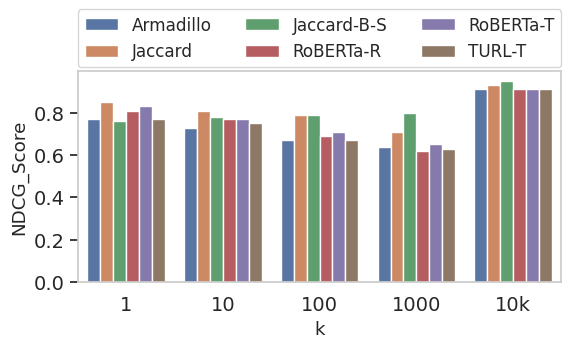

In [55]:
res = compare_models_ndcg('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/charts/ndcg_score.csv', fig_size=(6,4), position_legend=(0.5, 1.33), n_cols_legend=3, font_scale=1.1, out_pdf='/home/francesco.pugnaloni/armadillo_all/Armadillo_local/pdfs/'+'/ndcg_score.pdf')

In [24]:
res

,k,Approach,NDCG_Score
0,1,Armadillo,0.77
1,1,Jaccard,0.85
2,1,Jaccard-B-S,0.76
3,1,RoBERTa-R,0.81
4,1,RoBERTa-T,0.83
5,1,TURL-T,0.83
6,1,RoBERTa-T-N,0.67
7,1,BERT-T-N,0.68
8,10,Armadillo,0.73
9,10,Jaccard,0.81


# Overlap comp time area

In [16]:
from Code._performance_overlap_computation import *
def visualize_scatter_plot(exp_data_file: str | dict, logx: bool=True, logy: bool=True, out_pdf: str=None, font_size: int=10, fig_size=(8,8)) -> None:
    """visualize embedding generation time on the y axis and table area on the x axis

    Args:
        exp_data_file (str | dict): path to a file containing the data related to a "embed_all_no_paral" test or the dictionary containing the actual data
        logx (bool, opt): if True, the x axis is in logscale. Defaults to True.
        logy (bool, opt): if True, the y axis is in logscale. Defaults to False.
    """
    if isinstance(exp_data_file, str):
        with open(exp_data_file, 'rb') as f:
            data = pickle.load(f)
    else:
        data = exp_data_file

    keys = list(data.keys())

    areas = [data[k]['area'] for k in keys]
    t_execs = [data[k]['t_tot'] for k in keys]

    x = areas
    y = t_execs
    plt.figure()
    # Definisci la figura e gli assi per lo scatterplot
    fig, (ax_scatter, ax_kde) = plt.subplots(2, 1, figsize=fig_size, 
                                            gridspec_kw={'height_ratios': [3, 1]})
    ax_scatter.grid(False)
    ax_scatter.tick_params(left = True, bottom=True) 
    # Disegna lo scatterplot
    ax_scatter.scatter(x, y, s=3, c='orange', alpha=0.7, edgecolors='black')

    sns.histplot(
    data=x, ax=ax_kde,
    label='KDE',
    fill=True, common_norm=False,
    alpha=.5, linewidth=0, color='grey'
    )
    ax_scatter.set_ylabel('Embedding Time (s)', fontsize=font_size)
    
    if logx:
        ax_kde.set_xscale('log')    
        ax_scatter.set_xscale('log')
    if logy:
        ax_scatter.set_yscale('log')
    ax_kde.set_yscale('log')
    
    ax_kde.set_xlabel('Table Area', fontsize=font_size)
    ax_kde.set_ylabel('Number Of Samples', fontsize=font_size)

    ax_scatter.tick_params(axis='both', which='major', labelsize=font_size)  # Set font size for major ticks
    ax_kde.tick_params(axis='both', which='major', labelsize=font_size)  # Set font size for major ticks

    ax_scatter.tick_params(axis='both', which='both', labelsize=font_size)  # Set font size for tick labels
    ax_kde.tick_params(axis='both', which='both', labelsize=font_size)  # Set font size for tick labels

    # plt.tight_layout()
    plt.grid(False)
    plt.tick_params(left = True, bottom=True) 
    if isinstance(out_pdf, str):
        plt.savefig(out_pdf, format="pdf", bbox_inches="tight")

    plt.show()

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

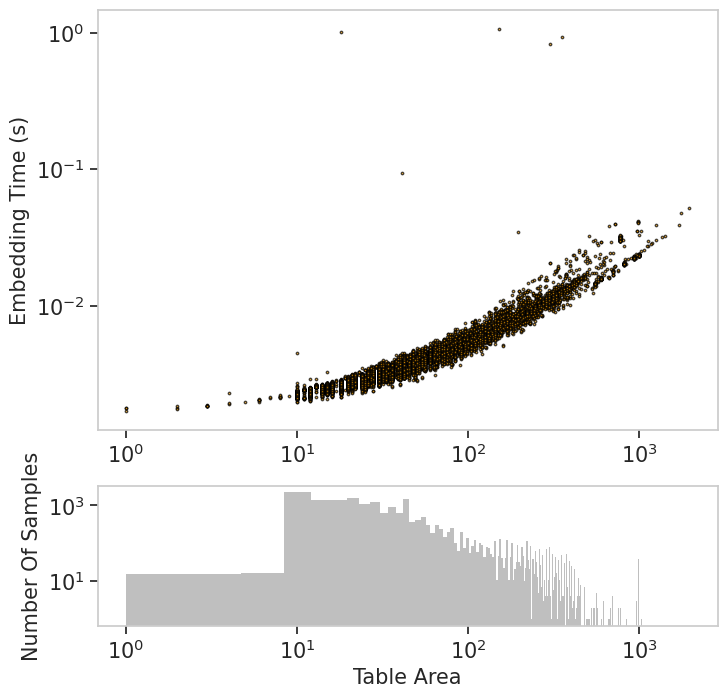

In [175]:
visualize_scatter_plot('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/embedding_dictionaries/t_execs_armadillo_w_w.pkl', logx=True, logy=True, out_pdf=None, font_size=15)

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

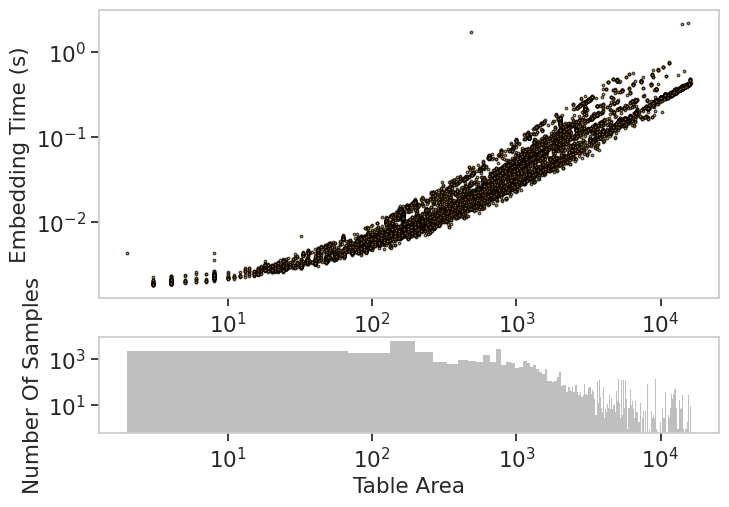

In [181]:
visualize_scatter_plot('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/dictionaries/embedding_dictionaries/t_execs_armadillo_g_g.pkl', logx=True, logy=True, out_pdf=None, font_size=15.5, fig_size=(8,5.5))

# TMP

In [40]:
df_with_turl = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/table_querying_results_with_turl_to_merge.csv')

In [42]:
df_with_turl

,r_id,r_w,r_h,r_a,s_id,s_w,s_h,s_a,jsim,jsim_time,...,roberta_t_ae,bert_r_overlap_time,bert_r_overlap_pred,bert_r_ae,armadillo_g_g_overlap_time,armadillo_g_g_overlap_pred,armadillo_g_g_ae,turl_overlap_time,turl_overlap_pred,turl_ae
0,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,object_csv_licensed.zip_appidsvc.dll.csv__3865...,11,173,1903,0.000000,0.000016,...,0.098099,3.179281,0.151208,0.151208,0.092323,0.299894,0.299894,0.238081,0.299331,0.299331
1,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,then_csv_licensed.zip_FOXNEWS.201210.csv,2,101,202,0.000000,0.000014,...,0.255863,1.007144,0.000000,0.000000,0.023935,0.290924,0.290924,0.261301,0.040405,0.040405
2,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,id_csv_licensed.zip_0021700946_4.csv,32,20,640,0.012698,0.000015,...,0.141294,0.508092,0.223881,0.214790,0.032352,0.011774,0.002683,0.156519,0.394702,0.385611
3,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,19,83,1577,0.006645,0.000014,...,0.112923,1.047990,0.294237,0.112419,0.051579,0.200185,0.018367,0.382741,0.406558,0.224740
4,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,living_thing_csv_licensed.zip_mrswunschel.csv,6,206,1236,0.023041,0.000040,...,0.173011,1.968897,0.357130,0.266221,0.069270,0.000000,0.090909,0.452383,0.035425,0.055484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,19,21,399,0.016000,0.000006,...,0.100276,0.427741,0.517760,0.335941,0.019902,0.237238,0.055420,0.110958,0.603798,0.421980
999996,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,object_csv_licensed.zip_metadata-info_58.csv,8,18,144,0.000000,0.000009,...,0.130103,0.373031,0.101996,0.101996,0.016646,0.000191,0.000191,0.111897,0.339280,0.339280
999997,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,speed_of_light_csv_licensed.zip_weather-2015-0...,14,32,448,0.004484,0.000009,...,0.015105,0.482967,0.366562,0.293835,0.023926,0.000000,0.072727,0.131215,0.397475,0.324747
999998,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,object_csv_licensed.zip_alg.exe.csv__417245484...,11,110,1210,0.004587,0.000010,...,0.420270,1.321187,0.350723,0.344662,0.040366,0.034149,0.028088,0.141144,0.503190,0.497130


In [41]:
df = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/table_querying_results.csv')

In [43]:
df['turl_overlap_time'] = df_with_turl['turl_overlap_time']
df['turl_overlap_pred'] = df_with_turl['turl_overlap_pred']
df['turl_ae'] = df_with_turl['turl_ae']

In [45]:
# df.to_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/evaluation/table_querying_results.csv', index=False)

# Recomputing jaccard union bag scaled

In [19]:
runtimes_wikitables = pd.read_csv(RESULTS_PATH_WIKI)
runtimes_gittables = pd.read_csv(RESULTS_PATH_GIT)

In [20]:
runtimes_wikitables['jaccard_bag_union_scaled_predictions'] = runtimes_wikitables['jaccard_bag_union_predictions']*2
runtimes_wikitables['jaccard_bag_union_scaled_predictions_ae'] = abs(runtimes_wikitables['jaccard_bag_union_scaled_predictions']-runtimes_wikitables['a%'])
runtimes_wikitables['jaccard_bag_union_scaled_predictions_ae'].mean()
runtimes_wikitables.to_csv(RESULTS_PATH_WIKI, index=False)

In [21]:
runtimes_gittables['jaccard_bag_union_scaled_predictions'] = runtimes_gittables['jaccard_bag_union_predictions']*2
runtimes_gittables['jaccard_bag_union_scaled_predictions_ae'] = abs(runtimes_gittables['jaccard_bag_union_scaled_predictions']-runtimes_gittables['a%'])
runtimes_gittables['jaccard_bag_union_scaled_predictions_ae'].mean()
runtimes_gittables.to_csv(RESULTS_PATH_GIT, index=False)

# MAE per table area

In [17]:
def compare_models_hist_area_ratio(data: pd.DataFrame | str, approaches: dict, bin_criterion: str='area_ratio', y_axis_name: str='MAE', bins_name: str='Area ratios', out_pdf: str=None, font_scale: float=1.45, n_col: int=4, fig_size=(8,6), title: str=None) -> None:
    if isinstance(data, str):
        data = pd.read_csv(data)
    ranges = f'{bins_name} Range' 
    new_data = {
        ranges:[],
        'Approach':[],
        y_axis_name:[]
    }
    for i in range(1, 11, 1):
        i /= 10
        prev = round(i-0.1, 2)
        t = data[data[bin_criterion] >= prev]
        if i == 1:
            t = t[t[bin_criterion] <= i]
        else:
            t = t[t[bin_criterion] < i] 
        curr =  f'[{prev},\n{i}]'
        for k in approaches.keys():
            new_data['Approach'].append(approaches[k])
            new_data[ranges].append(curr)
            new_data[y_axis_name].append(round(np.mean(t[k]),2))
    plt.figure(figsize=fig_size)
    df = pd.DataFrame(new_data)
    sns.set_theme(font_scale=font_scale, style="whitegrid")
    ax = sns.barplot(data=df, x=ranges, y=y_axis_name, hue='Approach')
    plt.grid(False)
    plt.tick_params(left = True) 
    plt.legend(bbox_to_anchor=(0.5, 1.29), loc='upper center', ncol=n_col)
    if isinstance(title, str):
        # insert the title on top of the legend
        plt.title(title, loc='center', fontsize=15, weight='bold')
        
    if isinstance(out_pdf, str):
        plt.tight_layout()
        plt.savefig(out_pdf, format="pdf", bbox_inches='tight')

In [18]:
def compare_models_hist_n_pairs_area_ratio(data: pd.DataFrame | str, approaches: dict, bin_criterion: str='area_ratio', y_axis_name: str='Number of samples', bins_name: str='Area ratios', out_pdf: str=None, font_scale: float=1.45, n_col: int=4, fig_size=(8,6)) -> None:
    if isinstance(data, str):
        data = pd.read_csv(data)
    ranges = f'{bins_name} Range' 
    new_data = {
        ranges:[],
        'Approach':[],
        y_axis_name:[]
    }
    for i in range(1, 11, 1):
        i /= 10
        prev = round(i-0.1, 2)
        t = data[data[bin_criterion] >= prev]
        if i == 1:
            t = t[t[bin_criterion] <= i]
        else:
            t = t[t[bin_criterion] < i] 
        curr =  f'[{prev},\n{i}]'
        for k in approaches.keys():
            new_data['Approach'].append(approaches[k])
            new_data[ranges].append(curr)
            new_data[y_axis_name].append(t.shape[0])
            # new_data[y_axis_name].append(round(np.mean(t[k]),2))
    plt.figure(figsize=fig_size)
    df = pd.DataFrame(new_data)
    sns.set_theme(font_scale=font_scale, style="whitegrid")
    ax = sns.barplot(data=df, x=ranges, y=y_axis_name, hue='Approach')
    plt.grid(False)
    plt.tick_params(left = True) 
    plt.legend(bbox_to_anchor=(0.5, 1.29), loc='upper center', ncol=n_col)
    # hide the legend inserted using plt.legend
    ax.get_legend().remove()

    if isinstance(out_pdf, str):
        plt.tight_layout()
        plt.savefig(out_pdf, format="pdf", bbox_inches='tight')

In [19]:
import pickle
def plot_area_distribution(table_dict: str|dict, log_x: bool=True) -> None:
    if isinstance(table_dict, str):
        with open(table_dict, 'rb') as f:
            table_dict = pickle.load(f)
    areas = [table_dict[k].shape[0]*table_dict[k].shape[1] for k in table_dict.keys()]
    plt.figure()
    sns.histplot(areas, kde=False)
    #show the x axis in log scale
    if log_x:
        plt.xscale('log')
    # x label is the area of the tables
    plt.xlabel('Table Area')
    plt.show()

Wiki

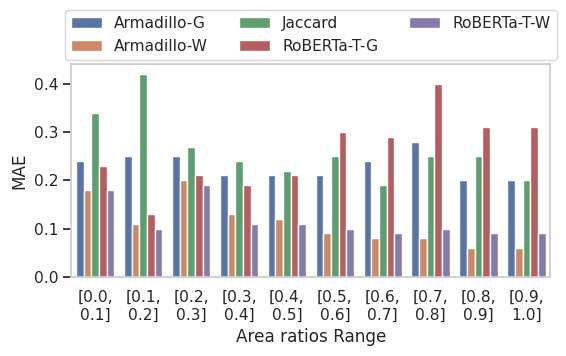

In [9]:
compare_models_hist_area_ratio(n_col=3, font_scale=1.01,fig_size=(6,4), data=runtimes_wikitables,approaches={'armadillo_g_w_ae':'Armadillo-G','armadillo_w_w_ae':'Armadillo-W','jsim_AE':'Jaccard','roberta_tables_300_300_gittables_ae':'RoBERTa-T-G','roberta_tables_300_300_wikilast_ae':'RoBERTa-T-W'},out_pdf=PDF_DIR+'mae_per_area_bin_wiki.pdf')

In [10]:
tmp_runtimes_wikitables = runtimes_wikitables
tmp_runtimes_wikitables['armadillo_w_w_me'] = tmp_runtimes_wikitables['armadillo_w_w_overlap_pred']-tmp_runtimes_wikitables['a%']
tmp_runtimes_wikitables['armadillo_g_w_me'] = tmp_runtimes_wikitables['armadillo_g_w_overlap_pred']-tmp_runtimes_wikitables['a%']
tmp_runtimes_wikitables['jsim_me'] = tmp_runtimes_wikitables['jsim']-tmp_runtimes_wikitables['a%']
tmp_runtimes_wikitables['roberta_tables_300_300_wikilast_me'] = tmp_runtimes_wikitables['roberta_tables_300_300_wikilast_overlap_pred']-tmp_runtimes_wikitables['a%']
tmp_runtimes_wikitables['roberta_tables_300_300_gittables_me'] = tmp_runtimes_wikitables['roberta_tables_300_300_gittables_overlap_pred']-tmp_runtimes_wikitables['a%']

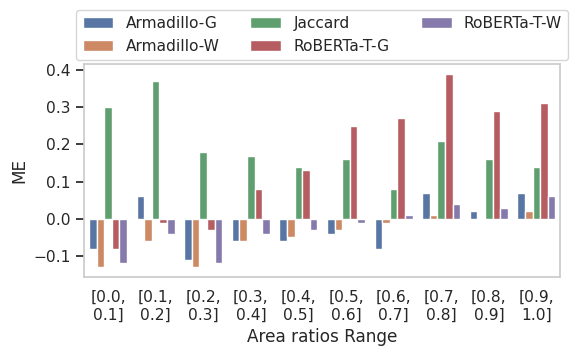

In [11]:
compare_models_hist_area_ratio(n_col=3, y_axis_name='ME', font_scale=1.01,fig_size=(6,4), data=runtimes_wikitables,approaches={'armadillo_g_w_me':'Armadillo-G','armadillo_w_w_me':'Armadillo-W','jsim_me':'Jaccard','roberta_tables_300_300_gittables_me':'RoBERTa-T-G','roberta_tables_300_300_wikilast_me':'RoBERTa-T-W'},out_pdf=PDF_DIR+'me_per_area_bin_wiki.pdf')

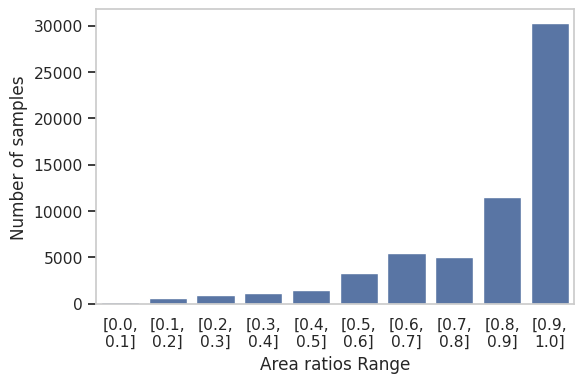

In [34]:
compare_models_hist_n_pairs_area_ratio(n_col=3, font_scale=1.01,fig_size=(6,4), data=runtimes_wikitables,approaches={'armadillo_g_w_me':'Armadillo-G'},out_pdf=PDF_DIR+'me_per_area_bin_wiki.pdf')

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


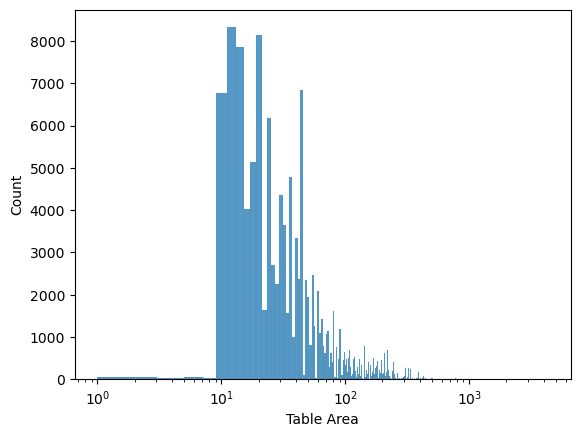

In [25]:
plot_area_distribution('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/table_dict.pkl')

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


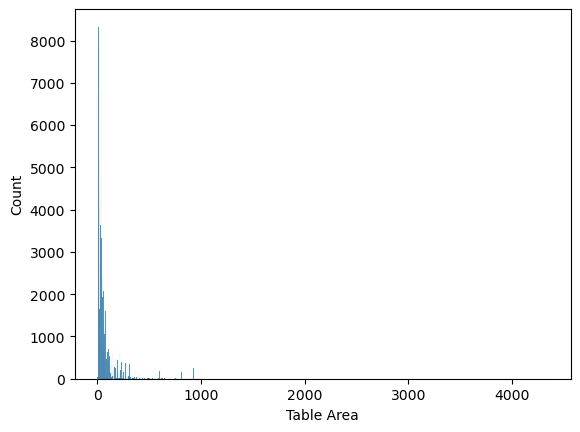

In [26]:
plot_area_distribution('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/dictionaries/table_dict.pkl', log_x=False)

Git

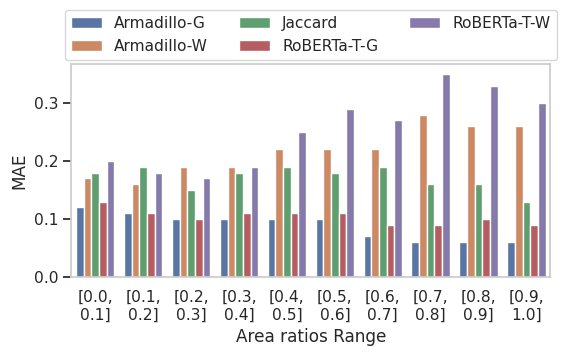

In [ ]:
compare_models_hist_area_ratio(n_col=3, font_scale=1.01,fig_size=(6,4),data=runtimes_gittables,approaches={'armadillo_g_g_ae':'Armadillo-G','armadillo_w_g_ae':'Armadillo-W','jsim_AE':'Jaccard','roberta_t_g_g_ae':'RoBERTa-T-G','roberta_t_w_g_ae':'RoBERTa-T-W'},out_pdf=PDF_DIR+'mae_per_area_bin_git.pdf')

In [24]:
tmp_runtime_gittables = runtimes_gittables
tmp_runtime_gittables['armadillo_g_g_me'] = tmp_runtime_gittables['armadillo_g_g_overlap_pred']-tmp_runtime_gittables['a%']
tmp_runtime_gittables['armadillo_w_g_me'] = tmp_runtime_gittables['armadillo_w_g_overlap_pred']-tmp_runtime_gittables['a%']
tmp_runtime_gittables['jsim_me'] = tmp_runtime_gittables['jsim']-tmp_runtime_gittables['a%']
tmp_runtime_gittables['roberta_t_g_g_me'] = tmp_runtime_gittables['roberta_t_g_g_overlap_pred']-tmp_runtime_gittables['a%']
tmp_runtime_gittables['roberta_t_w_g_me'] = tmp_runtime_gittables['roberta_t_w_g_overlap_pred']-tmp_runtime_gittables['a%']

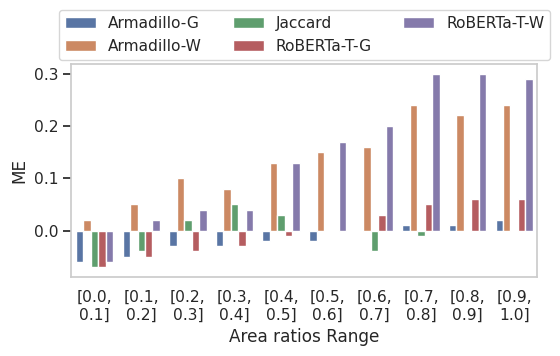

In [25]:
compare_models_hist_area_ratio(n_col=3, y_axis_name='ME', font_scale=1.01,fig_size=(6,4),data=runtimes_gittables,approaches={'armadillo_g_g_me':'Armadillo-G','armadillo_w_g_me':'Armadillo-W','jsim_me':'Jaccard','roberta_t_g_g_me':'RoBERTa-T-G','roberta_t_w_g_me':'RoBERTa-T-W'},out_pdf=PDF_DIR+'me_per_area_bin_git.pdf')

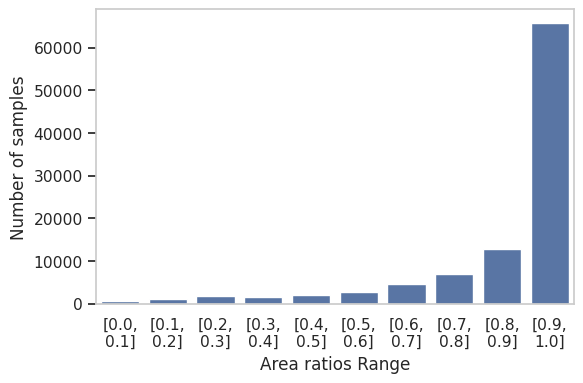

In [35]:
compare_models_hist_n_pairs_area_ratio(n_col=3, font_scale=1.01,fig_size=(6,4),data=runtimes_gittables,approaches={'armadillo_g_g_me':'Armadillo-G'},out_pdf=PDF_DIR+'me_per_area_bin_git.pdf')

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


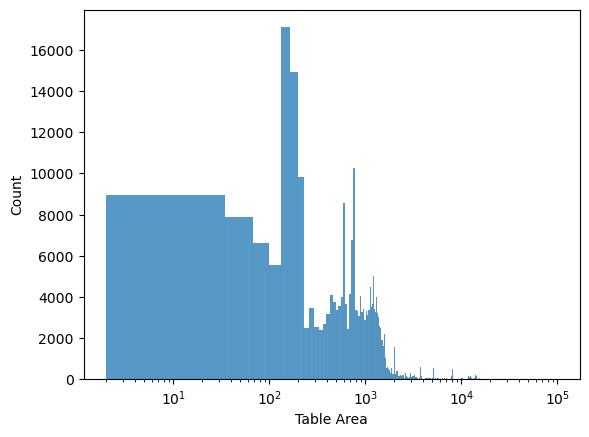

In [27]:
plot_area_distribution('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/dictionaries/table_dictionaries/table_dict.pkl')

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


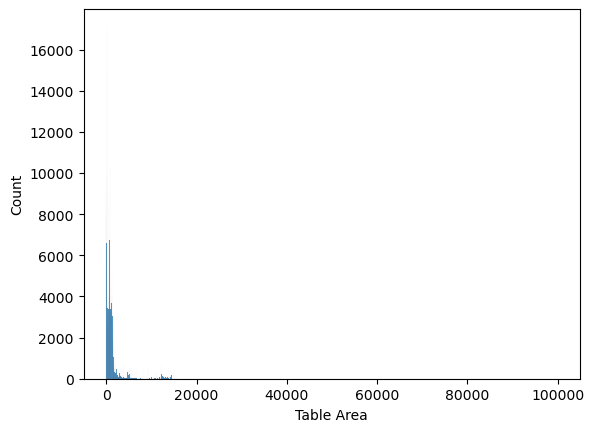

In [28]:
plot_area_distribution('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/dictionaries/table_dictionaries/table_dict.pkl', log_x=False)

# MAE / NDCG over runtime

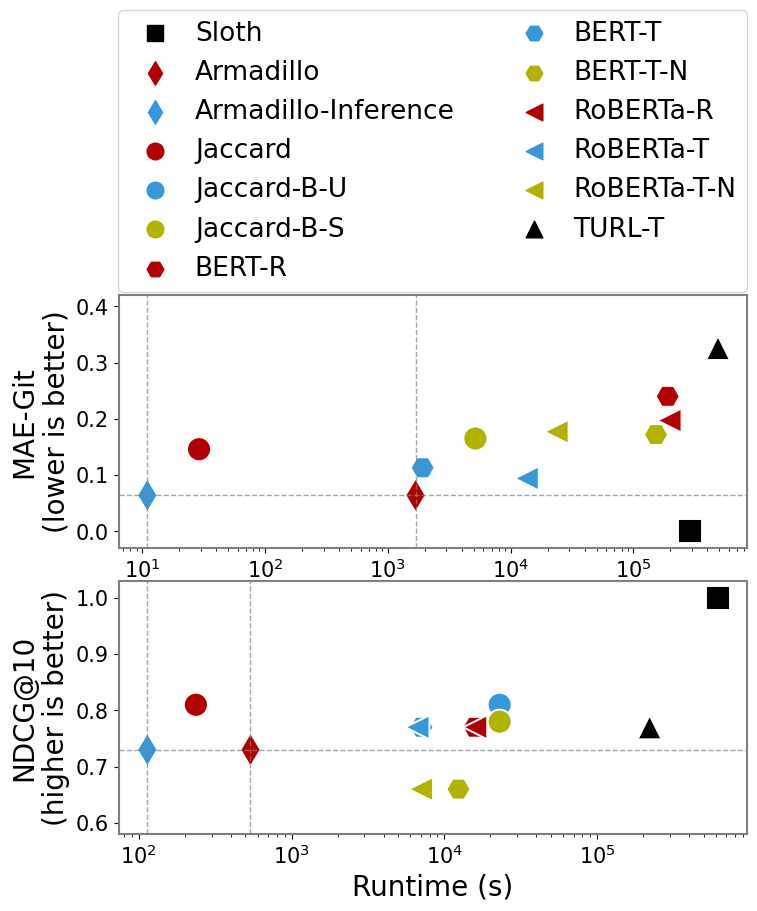

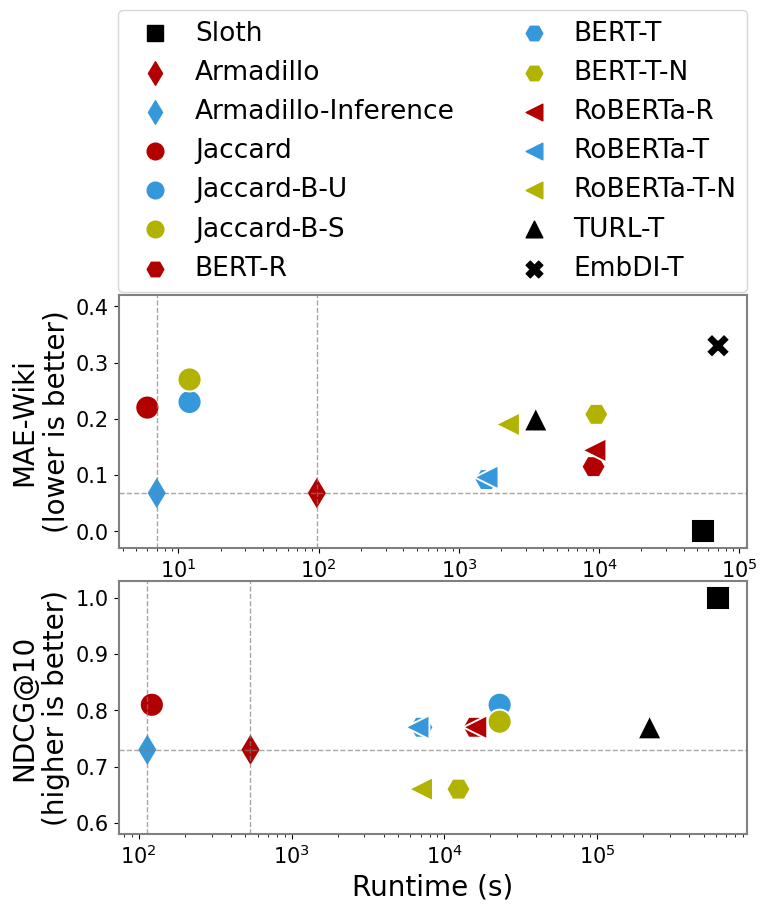

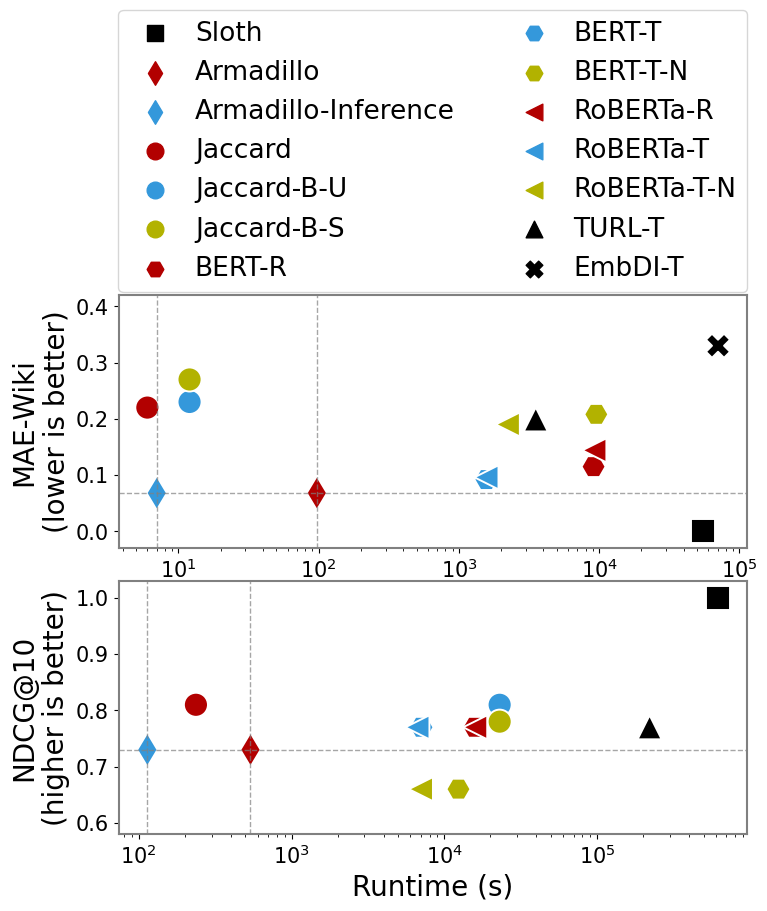

In [21]:
from matplotlib.ticker import FuncFormatter, MaxNLocator
def plot_combined_scatter(triples1, triples2, x_label='Runtime (s)', y_label1='MAE-Wiki\n(lower is better)', y_label2='NDCG@10\n(higher is better)', highlight_armadillo:bool = True, figsize: tuple=(9.4,10), 
                          fontsize: int= 14, out_pdf=None, frame_color: str='grey', show_grid: bool=False, legend_pos: float=1.5, log_scale: bool=True, legend_order: list=None, n_cols: int=5, dot_size: int=100):
    df1 = pd.DataFrame(triples1, columns=['legend_name', 'x_value', 'y_value'])
    df2 = pd.DataFrame(triples2, columns=['legend_name', 'x_value', 'y_value'])
#
# Combine both datasets to determine unique legend names

    style_mapping = {
        'Sloth':'s',      
        'Armadillo':            'd',  
        'Armadillo-Inference':  'd',
        'Jaccard':              'o',    
        'Jaccard-B-U':          'o',
        'Jaccard-B-S':          'o',
        'BERT-R':               'H',     
        'BERT-T':               'H',     
        'BERT-T-N':             'H',   
        'RoBERTa-R':            '<',  
        'RoBERTa-T':            '<',  
        'RoBERTa-T-N':          '<',
        'TURL-T':               '^',     
        'EmbDI-T':              'X'}
    color_mapping = {'Sloth':'#000000',      
        'Armadillo':'#B20000',  
        'Armadillo-Inference':'#3498DB',

        'Jaccard':'#B20000',    
        'Jaccard-B-U':'#3498DB',
        'Jaccard-B-S':'#B2B200',

        'BERT-R':'#B20000',     
        'BERT-T':'#3498DB',     
        'BERT-T-N':'#B2B200',   

        'RoBERTa-R':'#B20000',  
        'RoBERTa-T':'#3498DB',  
        'RoBERTa-T-N':'#B2B200',

        'TURL-T':'#000000',     
        'EmbDI-T':'#000000'}
    # combined_df = pd.concat([df1, df2], ignore_index=True)
    # unique_legend_names = combined_df['legend_name'].unique()
    
    # Create consistent palettes and styles
    # palette = sns.color_palette("husl", len(unique_legend_names))
    # markers = ['s', 'D', 'X', '^', 'v', '<', '>', 'P', '*', 'H', 'h', 'd', '8', 'p', '3', '4', '1', '2', '+']


    # style_mapping = {name: markers[i % len(markers)] for i, name in enumerate(unique_legend_names)}
    # color_mapping = {name: palette[i] for i, name in enumerate(unique_legend_names)}
#
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, gridspec_kw={'hspace': 0.13})
    
    sns.scatterplot(data=df1, x='x_value', y='y_value', hue='legend_name', style='legend_name', s=dot_size, ax=ax1,
                     palette=color_mapping, markers=style_mapping)
    ax1.set_xlabel(x_label, fontsize=fontsize)
    ax1.xaxis.label.set_visible(False)
    
    ax1.set_ylabel(y_label1, fontsize=fontsize)
    ax1.set_ylim(-0.03, 0.42)
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))
    ax1.yaxis.set_major_locator(MaxNLocator(5))
    ax1.tick_params(axis='both', which='major', labelsize=fontsize-5)
    ax1.tick_params(axis='both', which='minor', labelsize=fontsize-5)
    if show_grid:
        ax1.grid(axis='y', which='major', linestyle='-', linewidth=0.7, alpha=0.7)
    if highlight_armadillo:
        ax1.axvline(x=triples1[1][1], color='grey', linestyle='--', linewidth=1, alpha=0.7)
        ax1.axhline(y=triples1[1][2], color='grey', linestyle='--', linewidth=1, alpha=0.7)
        ax1.axvline(x=triples1[2][1], color='grey', linestyle='--', linewidth=1, alpha=0.7)

    if log_scale:
        ax1.set_xscale('log')
    # if legend_order is not None:
    handles, labels = ax1.get_legend_handles_labels()
    sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: legend_order.index(x[1]) if x[1] in legend_order else float('inf'))
    sorted_handles, sorted_labels = zip(*sorted_handles_labels)
    ax1.legend(sorted_handles, sorted_labels, title='', loc='center', bbox_to_anchor=(0.5, legend_pos), ncol=n_cols, fontsize=fontsize-1, 
               scatterpoints=1, handletextpad=0.5,markerscale=2.0)
    # else:
    #     ax1.legend(
    #         title='', 
    #         loc='center', 
    #         bbox_to_anchor=(0.5, legend_pos),  # Center the legend in the middle of the chart
    #         ncol=n_cols,
    #         fontsize=fontsize-1
    #     )

    for spine in ax1.spines.values():
        spine.set_edgecolor(frame_color)
        spine.set_linewidth(1.5)  # Optional: Adjust border thickness

    sns.scatterplot(data=df2, x='x_value', y='y_value', hue='legend_name', style='legend_name', s=dot_size, ax=ax2,
                     palette=color_mapping, markers=style_mapping)
    ax2.set_xlabel(x_label, fontsize=fontsize)
    ax2.set_ylabel(y_label2, fontsize=fontsize)
    ax2.set_ylim(0.58, 1.03)
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.1f}"))
    ax2.yaxis.set_major_locator(MaxNLocator(5))
    ax2.tick_params(axis='both', which='major', labelsize=fontsize-5)
    ax2.tick_params(axis='both', which='minor', labelsize=fontsize-5)
    if highlight_armadillo:
        ax2.axvline(x=539, color='grey', linestyle='--', linewidth=1, alpha=0.7)
        ax2.axhline(y=0.73, color='grey', linestyle='--', linewidth=1, alpha=0.7)
        ax2.axvline(x=114, color='grey', linestyle='--', linewidth=1, alpha=0.7)
    if show_grid:
        ax2.grid(axis='y', which='major', linestyle='-', linewidth=0.7, alpha=0.7)

    if log_scale:
        ax2.set_xscale('log')
    ax2.legend().set_visible(False)
    for spine in ax2.spines.values():
        spine.set_edgecolor(frame_color)
        spine.set_linewidth(1.5)  # Optional: Adjust border thickness

    
    if out_pdf:
        plt.savefig(out_pdf, format='pdf', bbox_inches='tight')
    
    plt.show()

triples_matching_wiki = [
    ('Sloth',       54_900, 0),
    ('Armadillo',   97,     0.068),
    ('Armadillo-Inference', 7,0.068),
    ('Jaccard',     6,   0.220),
    ('Jaccard-B-U', 12,     0.230),
    ('Jaccard-B-S', 12,     0.270),
    ('TURL-T',      3_531,  0.199),
    ('BERT-R',      9_120,  0.115),
    ('BERT-T',      1_571,  0.092),
    ('BERT-T-N',    9_540,  0.208),
    ('RoBERTa-R',   9_240,  0.144),
    ('RoBERTa-T',   1_571,  0.096),
    ('RoBERTa-T-N', 2_231,  0.190),
    ('EmbDI-T',     70_380, 0.330)
]

triples_matching_git = [
    ('Sloth',       288_180, 0),
    ('Armadillo',   1_680,     0.064),
    ('Armadillo-Inference', 11,0.064),
    ('Jaccard',     29,   0.146),
    ('Jaccard-B-U', 5_160,     0.163),
    ('Jaccard-B-S', 5_160,     0.165),
    ('TURL-T',      487_980,  0.326),
    ('BERT-R',      190_020,  0.240),
    ('BERT-T',      19_20,  0.113),
    ('BERT-T-N',    152_700,  0.172),
    ('RoBERTa-R',   196_440,  0.197),
    ('RoBERTa-T',   13_500,  0.094),
    ('RoBERTa-T-N', 23_640,  0.177),
]

triples_querying = [
    ('Sloth',       616_200, 1),
    ('Armadillo',   539, 0.73),
    ('Armadillo-Inference', 114,0.73),
    ('Jaccard',     237,     0.81),
    ('Jaccard-B-U', 22_980, 0.81),
    ('Jaccard-B-S', 22_980, 0.78),
    ('TURL-T',      21_9960,0.77),
    ('BERT-R',      15_760, 0.77),
    ('BERT-T',      7_080, 0.77),
    ('BERT-T-N',    12_360, 0.66),
    ('RoBERTa-R',   15_900, 0.77),
    ('RoBERTa-T',   6_660, 0.77),
    ('RoBERTa-T-N', 7_020, 0.66)
]

triples_querying_alt = [
    ('Sloth',       616_200, 1),
    ('Armadillo',   539, 0.73),
    ('Armadillo-Inference', 114,0.73),
    ('Jaccard',     122,     0.81),
    ('Jaccard-B-U', 22_980, 0.81),
    ('Jaccard-B-S', 22_980, 0.78),
    ('TURL-T',      21_9960,0.77),
    ('BERT-R',      15_760, 0.77),
    ('BERT-T',      7_080, 0.77),
    ('BERT-T-N',    12_360, 0.66),
    ('RoBERTa-R',   15_900, 0.77),
    ('RoBERTa-T',   6_660, 0.77),
    ('RoBERTa-T-N', 7_020, 0.66)
]

plot_combined_scatter(triples_matching_git, triples_querying, fontsize=20, figsize=(8.1,7), legend_pos=1.57, highlight_armadillo = True, n_cols=2, show_grid=False, dot_size=300, log_scale=True, y_label1='MAE-Git\n(lower is better)', legend_order=['Sloth', 'Armadillo', 'Armadillo-Inference', 'Jaccard', 'Jaccard-B-U', 'Jaccard-B-S', 'BERT-R', 'BERT-T', 'BERT-T-N', 'RoBERTa-R', 'RoBERTa-T', 'RoBERTa-T-N', 'TURL-T', 'EmbDI-T'], out_pdf='/home/francesco.pugnaloni/armadillo_all/Armadillo_local/pdfs/mae_ndcg_runtime.pdf')

plot_combined_scatter(triples_matching_wiki, triples_querying_alt, fontsize=20, figsize=(8.1,7), legend_pos=1.57, highlight_armadillo = True, n_cols=2, show_grid=False, dot_size=300, log_scale=True, legend_order=['Sloth', 'Armadillo', 'Armadillo-Inference', 'Jaccard', 'Jaccard-B-U', 'Jaccard-B-S', 'BERT-R', 'BERT-T', 'BERT-T-N', 'RoBERTa-R', 'RoBERTa-T', 'RoBERTa-T-N', 'TURL-T', 'EmbDI-T'], out_pdf='/home/francesco.pugnaloni/armadillo_all/Armadillo_local/pdfs/mae_ndcg_runtime.pdf')

plot_combined_scatter(triples_matching_wiki, triples_querying, fontsize=20, figsize=(8.1,7), legend_pos=1.57, highlight_armadillo = True, n_cols=2, show_grid=False, dot_size=300, log_scale=True, legend_order=['Sloth', 'Armadillo', 'Armadillo-Inference', 'Jaccard', 'Jaccard-B-U', 'Jaccard-B-S', 'BERT-R', 'BERT-T', 'BERT-T-N', 'RoBERTa-R', 'RoBERTa-T', 'RoBERTa-T-N', 'TURL-T', 'EmbDI-T'], out_pdf='/home/francesco.pugnaloni/armadillo_all/Armadillo_local/pdfs/mae_ndcg_runtime.pdf')

# Prepare triple dataset

In [22]:
import pandas as pd

In [50]:
train = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/train.csv')[['r_id','s_id','a%']]
train.iloc[:250_000].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/GitTables/train_0_250k.csv', index=False)
train.iloc[250_000:].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/GitTables/train_250k_500k.csv', index=False)
pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/test.csv')[['r_id','s_id','a%']].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/GitTables/test.csv', index=False)
pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/valid.csv')[['r_id','s_id','a%']].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/GitTables/valid.csv', index=False)

In [51]:
pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/train.csv')[['r_id','s_id','a%']].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/WikiTables/train.csv', index=False)
pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/test.csv')[['r_id','s_id','a%']].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/WikiTables/test.csv', index=False)
pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/WikiTables/valid.csv')[['r_id','s_id','a%']].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/WikiTables/valid.csv', index=False)

In [52]:
querying = pd.read_csv('/home/francesco.pugnaloni/armadillo_all/datasets/GitTables/table_querying/table_querying_stats.csv')[['r_id','s_id','a%']]
querying.iloc[0:250_000].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/Table_Querying/correct_labels_0_250k.csv', index=False)
querying.iloc[250_000:500_000].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/Table_Querying/correct_labels_250k_500k.csv', index=False)
querying.iloc[500_000:750_000].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/Table_Querying/correct_labels_500k_750k.csv', index=False)
querying.iloc[750_000:].to_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/Table_Querying/correct_labels_750k_1M.csv', index=False)

In [35]:
querying

,r_id,r_w,r_h,r_a,s_id,s_w,s_h,s_a,jsim,jsim_time,josie,josie_time,seeds,algo,o_w,o_h,o_a,total_time,a%
0,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,object_csv_licensed.zip_appidsvc.dll.csv__3865...,11,173,1903,0.000000,0.000016,0.000000,0.000005,0,NaN,0.0,0.0,0.0,0.002043,0.000000
1,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,then_csv_licensed.zip_FOXNEWS.201210.csv,2,101,202,0.000000,0.000014,0.000000,0.000002,0,NaN,0.0,0.0,0.0,0.000469,0.000000
2,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,id_csv_licensed.zip_0021700946_4.csv,32,20,640,0.012698,0.000015,0.044944,0.000003,7,e,1.0,2.0,2.0,0.002701,0.009091
3,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,19,83,1577,0.006645,0.000014,0.022472,0.000019,21,e,2.0,20.0,40.0,0.002120,0.181818
4,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,11,20,220,living_thing_csv_licensed.zip_mrswunschel.csv,6,206,1236,0.023041,0.000040,0.224719,0.000004,1,e,1.0,20.0,20.0,0.001442,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,19,21,399,0.016000,0.000006,0.039216,0.000002,34,e,2.0,15.0,30.0,0.001341,0.181818
999996,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,object_csv_licensed.zip_metadata-info_58.csv,8,18,144,0.000000,0.000009,0.000000,0.000001,0,NaN,0.0,0.0,0.0,0.000560,0.000000
999997,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,speed_of_light_csv_licensed.zip_weather-2015-0...,14,32,448,0.004484,0.000009,0.013158,0.000002,3,e,1.0,12.0,12.0,0.000979,0.072727
999998,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,11,15,165,object_csv_licensed.zip_alg.exe.csv__417245484...,11,110,1210,0.004587,0.000010,0.013158,0.000002,1,e,1.0,1.0,1.0,0.001318,0.006061


In [37]:
pd.read_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/Table_Querying/correct_labels.csv')

,r_id,s_id,a%
0,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,object_csv_licensed.zip_appidsvc.dll.csv__3865...,0.000000
1,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,then_csv_licensed.zip_FOXNEWS.201210.csv,0.000000
2,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,id_csv_licensed.zip_0021700946_4.csv,0.009091
3,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.181818
4,show_time_csv_licensed.zip_P05-1013.annv3_16.csv,living_thing_csv_licensed.zip_mrswunschel.csv,0.090909
...,...,...,...
999995,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,0.181818
999996,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,object_csv_licensed.zip_metadata-info_58.csv,0.000000
999997,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,speed_of_light_csv_licensed.zip_weather-2015-0...,0.072727
999998,data_rate_csv_licensed.zip_A00-2018_akanksha_1...,object_csv_licensed.zip_alg.exe.csv__417245484...,0.006061


In [45]:
pd.read_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/WikiTables/train.csv')

,r_id,s_id,a%
0,155.39558.csv,437.7146.csv,0.625000
1,323.80474.csv,53.41837.csv,0.363636
2,331.55837.csv,497.29414.csv,0.277778
3,124.96752.csv,230.72970.csv,0.187500
4,237.29154.csv,603.25921.csv,1.000000
...,...,...,...
499995,425.77964.csv,426.139959.csv,1.000000
499996,142.36784.csv,426.63559.csv,0.400000
499997,474.8903.csv,485.23755.csv,0.909091
499998,384.32709.csv,501.26246.csv,1.000000


In [46]:
pd.read_csv('/home/francesco.pugnaloni/triples_to_release_sigmod/GitTables/train.csv')

,r_id,s_id,a%
0,object_csv_licensed.zip_Configuration3_window1...,object_csv_licensed.zip_Configuration3_window1...,0.367868
1,seek_time_csv_licensed.zip_PL1331LAGS1A5H.csv,seek_time_csv_licensed.zip_PL1331LAGT4LWH.csv,0.604601
2,object_csv_licensed.zip_Configuration1_window1...,parent_csv_licensed.zip_Configuration2_window1...,1.000000
3,seek_time_csv_licensed.zip_PL2331LAHDLXDJ.csv,seek_time_csv_licensed.zip_PL2331LAHDWHUJ.csv,0.825593
4,object_csv_licensed.zip_Configuration2_window1...,object_csv_licensed.zip_Configuration3_window6...,1.000000
...,...,...,...
499995,show_time_csv_licensed.zip_1987-02-28_5.csv,real_time_csv_licensed.zip_Inception-v2_203.csv,0.000000
499996,lead_time_csv_licensed.zip_2017恋练有词考研词组背多分.csv,object_csv_licensed.zip_TotalResultsofRhino.v1...,0.000000
499997,object_csv_licensed.zip_funcs_by_name_161.csv,then_csv_licensed.zip_17-18_431.csv,0.000000
499998,speed_of_light_csv_licensed.zip_funcs_by_addre...,inflation_rate_csv_licensed.zip_011-DA_User_ba...,0.000000


In [49]:
train.iloc[:250_000]

,r_id,s_id,a%
0,object_csv_licensed.zip_Configuration3_window1...,object_csv_licensed.zip_Configuration3_window1...,0.367868
1,seek_time_csv_licensed.zip_PL1331LAGS1A5H.csv,seek_time_csv_licensed.zip_PL1331LAGT4LWH.csv,0.604601
2,object_csv_licensed.zip_Configuration1_window1...,parent_csv_licensed.zip_Configuration2_window1...,1.000000
3,seek_time_csv_licensed.zip_PL2331LAHDLXDJ.csv,seek_time_csv_licensed.zip_PL2331LAHDWHUJ.csv,0.825593
4,object_csv_licensed.zip_Configuration2_window1...,object_csv_licensed.zip_Configuration3_window6...,1.000000
...,...,...,...
249995,id_csv_licensed.zip_4087.csv,id_csv_licensed.zip_7712_1.csv,0.125000
249996,beauty_sleep_csv_licensed.zip_onlywomenwriters...,running_time_csv_licensed.zip_fifty1850-1899_v...,0.451154
249997,seek_time_csv_licensed.zip_PL1331LAGTW8KH.csv,seek_time_csv_licensed.zip_PL2331LAGSUKJJ.csv,0.519747
249998,whole_csv_licensed.zip_P08-1028_swastika_170.csv,whole_csv_licensed.zip_P08-1028_swastika_85.csv,1.000000
